In [1]:
from google.colab import files
uploaded = files.upload()

Saving binance_coin.csv to binance_coin.csv


In [3]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

In [4]:
BC = pd.read_csv("binance_coin.csv")

In [5]:
BC.head()

date  txVolume(USD)  txCount  marketcap(USD)  price(USD)  \
0  2018-08-12   5.324507e+06      284    1.116316e+09       11.69   
1  2018-08-11   8.842441e+06      480    1.156717e+09       12.11   
2  2018-08-10   5.336434e+06      394    1.219513e+09       12.77   
3  2018-08-09   1.180933e+07      365    1.161589e+09       12.16   
4  2018-08-08   8.283784e+06      881    1.253974e+09       13.13   

   exchangeVolume(USD)  activeAddresses  medianTxValue(USD)  
0           23290300.0              212          283.703661  
1           29253100.0              321          349.972280  
2           37026400.0              294          240.996397  
3           41389000.0              251          269.626930  
4           44898500.0              262         6562.636600

In [6]:
BC.tail()

date  txVolume(USD)  txCount  marketcap(USD)  price(USD)  \
397  2017-07-11            NaN      404             NaN         NaN   
398  2017-07-10            NaN       68             NaN         NaN   
399  2017-07-09            NaN      137             NaN         NaN   
400  2017-07-08            NaN       35             NaN         NaN   
401  2017-07-07            NaN        8             NaN         NaN   

     exchangeVolume(USD)  activeAddresses  medianTxValue(USD)  
397                  NaN              304                 NaN  
398                  NaN               55                 NaN  
399                  NaN               82                 NaN  
400                  NaN               24                 NaN  
401                  NaN                6                 NaN

In [7]:
BC.describe()

txVolume(USD)        txCount  marketcap(USD)  price(USD)  \
count   3.840000e+02     402.000000    3.840000e+02  384.000000   
mean    3.797621e+06    1115.236318    8.783184e+08    8.296333   
std     1.053778e+07    8356.221789    6.432272e+08    5.890602   
min     1.472437e+03       3.000000    9.972124e+06    0.099721   
25%     4.146597e+05     137.000000    1.649780e+08    1.667500   
50%     1.270251e+06     250.500000    9.472354e+08    9.570000   
75%     3.242137e+06     395.500000    1.448657e+09   13.350000   
max     1.313159e+08  143809.000000    2.254461e+09   22.770000   

       exchangeVolume(USD)  activeAddresses  medianTxValue(USD)  
count         3.840000e+02       402.000000          384.000000  
mean          6.249715e+07      1000.099502          708.771415  
std           6.752113e+07      7643.993696         1127.357876  
min           9.284000e+03         6.000000            0.126000  
25%           1.419562e+07       136.000000          257.137129  
50%           4.934125e+07       224.500000          459.126111  
75%           8.382670e+07       316.500000          733.593413  
max           6.370210e+08    133783.000000         9431.678260

In [8]:
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 402 non-null    object 
 1   txVolume(USD)        384 non-null    float64
 2   txCount              402 non-null    int64  
 3   marketcap(USD)       384 non-null    float64
 4   price(USD)           384 non-null    float64
 5   exchangeVolume(USD)  384 non-null    float64
 6   activeAddresses      402 non-null    int64  
 7   medianTxValue(USD)   384 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 25.3+ KB


In [9]:
BC.isnull().sum()

date                    0
txVolume(USD)          18
txCount                 0
marketcap(USD)         18
price(USD)             18
exchangeVolume(USD)    18
activeAddresses         0
medianTxValue(USD)     18
dtype: int64

In [11]:
BC.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
397    False
398    False
399    False
400    False
401    False
Length: 402, dtype: bool

In [12]:
BC.shape

(402, 8)

In [13]:
BC.columns

Index(['date', 'txVolume(USD)', 'txCount', 'marketcap(USD)', 'price(USD)',
       'exchangeVolume(USD)', 'activeAddresses', 'medianTxValue(USD)'],
      dtype='object')

In [14]:
BC.value_counts()

date        txVolume(USD)  txCount  marketcap(USD)  price(USD)  exchangeVolume(USD)  activeAddresses  medianTxValue(USD)
2018-07-27  1.355392e+07   1550     1.279151e+09    13.390000   66040700.0           1107             2419.256996           1
2018-07-26  1.254937e+07   1607     1.234165e+09    12.920000   61881400.0           827              5229.757600           1
2018-07-25  4.224614e+06   590      1.154460e+09    12.090000   72083200.0           410              496.185690            1
2018-07-24  2.221910e+06   412      1.148271e+09    12.020000   46762700.0           369              290.831042            1
2018-07-23  4.001706e+06   391      1.159216e+09    12.140000   28137700.0           298              470.017441            1
                                                                                                                           ..
2017-07-29  2.458873e+04   3        1.047824e+07    0.104782    340218.0             6                755.059092            1
2017-07-28  9.536223e+03   14       1.076316e+07    0.107632    342568.0             19               290.498768            1
2017-07-27  1.623164e+04   17       1.051078e+07    0.105108    344499.0             22               348.645233            1
2017-07-26  5.858572e+03   9        1.058926e+07    0.105893    200395.0             11               282.946096            1
2017-07-25  4.177574e+04   29       1.152027e+07    0.115203    145269.0             21               574.286955            1
Name: count, Length: 384, dtype: int64

-- EDA --

In [15]:
def del_cols_with_many_nans(BC : pd.DataFrame) -> pd.DataFrame:
    cols = list(BC.columns)
    new_cols = []
    data_len = float(len(BC))
    for col in cols:
        nans_count = float(BC[col].isna().sum())
        if(nans_count/data_len <= 0.01):
            new_cols.append(col)
    return BC[new_cols]

In [18]:
BC = del_cols_with_many_nans(BC).dropna()
print("cols: " + str(len(BC.columns)) + " number of object: " + str(len(BC)))

cols: 3 number of object: 402


In [19]:
def select_month(BC : pd.DataFrame) -> pd.DataFrame:
    new_data = BC.copy()
    new_data["month"] = list(range(len(new_data)))
    for i in new_data.index:
        new_data["month"][i] = float( new_data["date"][i].split("-")[1])
    cols = list(new_data.columns)[1:]
    return new_data[cols].astype("float")

def select_year(BC : pd.DataFrame) -> pd.DataFrame:
    new_data = BC.copy()
    new_data["year"] = list(range(len(new_data)))
    for i in new_data.index:
        new_data["year"][i] = float( new_data["date"][i].split("-")[0])
    cols = list(new_data.columns)[1:]
    return new_data[cols].astype("float")

In [ ]:
data_per_month = select_month(BC.copy()) # Apply the function to the entire DataFrame

data_per_year = select_year(BC.copy())

In [27]:
# If you want to display the dataframes:
print("Data per month:")
print(data_per_month.head())  # Display the first few rows for a preview

print("\nData per year:")
print(data_per_year.head())  # Display the first few rows for a preview

Data per month:
   txCount  activeAddresses  month
0    284.0            212.0    8.0
1    480.0            321.0    8.0
2    394.0            294.0    8.0
3    365.0            251.0    8.0
4    881.0            262.0    8.0

Data per year:
   txCount  activeAddresses    year
0    284.0            212.0  2018.0
1    480.0            321.0  2018.0
2    394.0            294.0  2018.0
3    365.0            251.0  2018.0
4    881.0            262.0  2018.0


== Visualization ==


In [31]:
cryptocurrencies = [
    "binance coin",
    "bitcoin",
    "bitcoin gold",
    "dash",
    "dogecoin",
    "ethereum",
    "ethereum classic",
    "litecoin",
    "tether"
]

In [29]:
def visualize_for_month(BC : pd.DataFrame, currency : str):
    plt.figure(figsize=(13, 13))
    for col in BC.columns:
        plt.plot(BC.index, np.cbrt(np.cbrt(BC[col])), label=col)

    plt.xlabel("month")
    plt.ylabel("root of the 9th degree of mean")
    plt.title(currency)
    plt.legend()
    plt.show()
def visualize_for_year(data : pd.DataFrame, currency : str):
    global cryptocurrencies

    plt.figure(figsize=(13, 13))
    for col in data.columns:
        plt.plot(data.index, np.cbrt(np.cbrt(data[col])), label=col)

    plt.xlabel("year")
    plt.ylabel("root of the 9th degree of mean")
    plt.title(currency)
    plt.legend()
    plt.show()

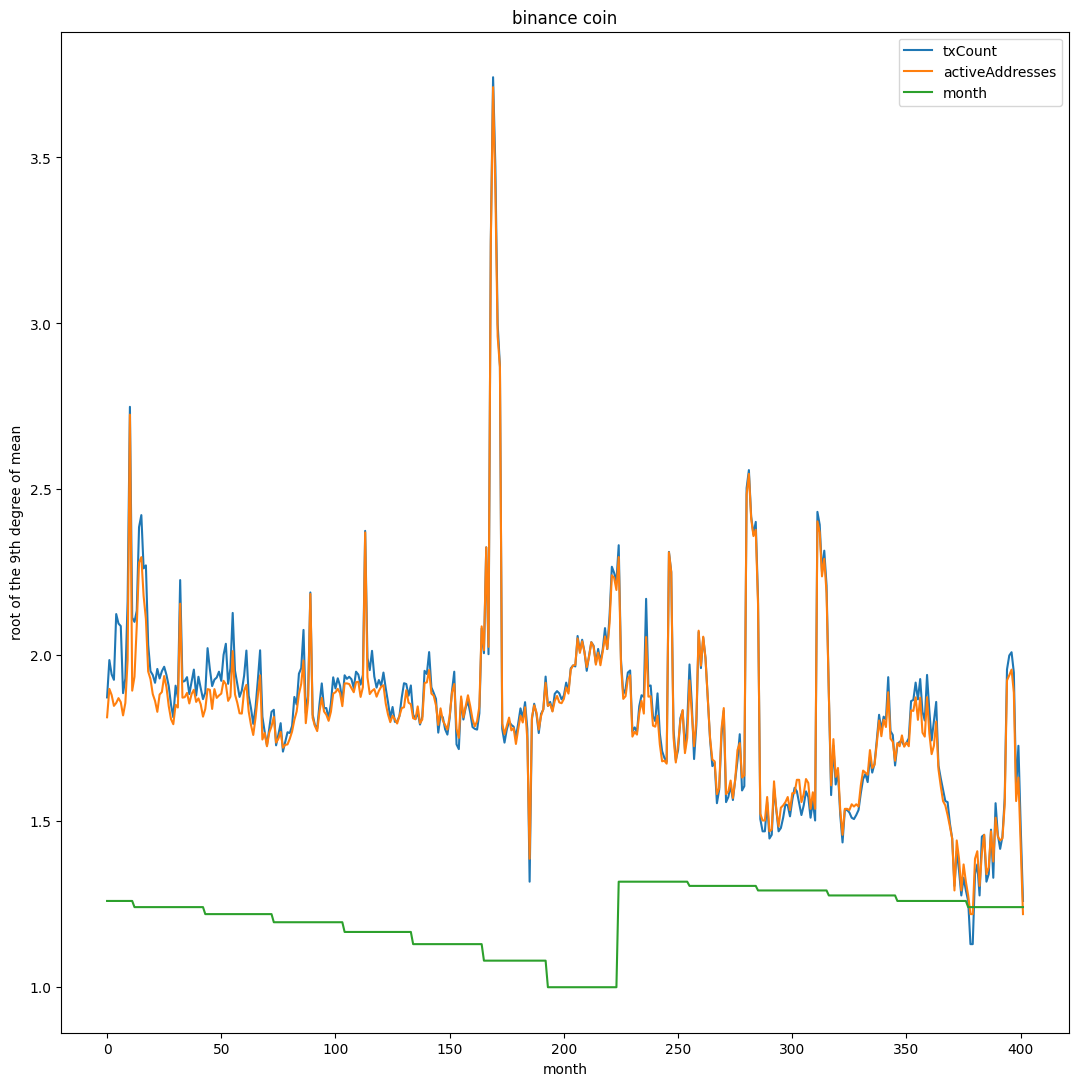

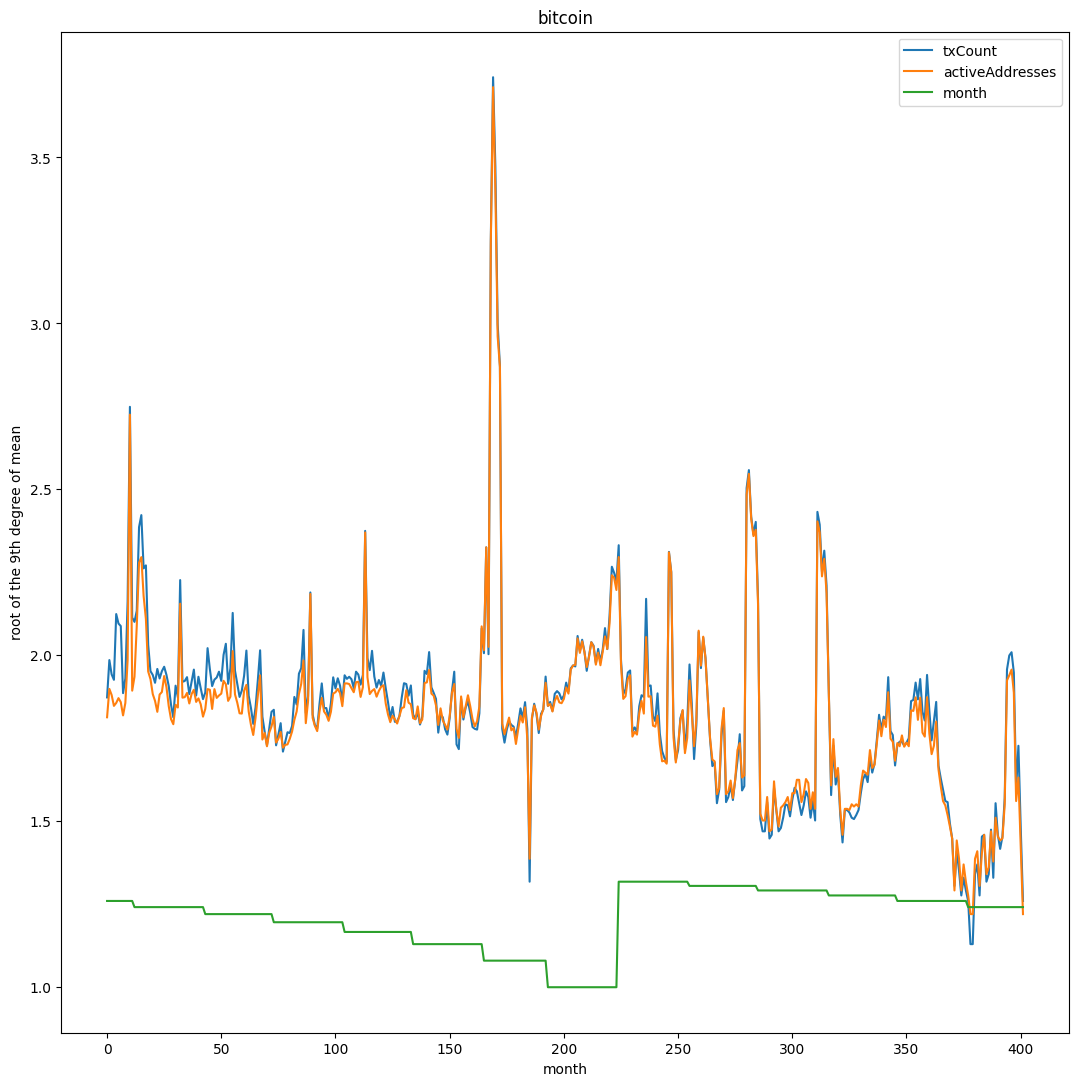

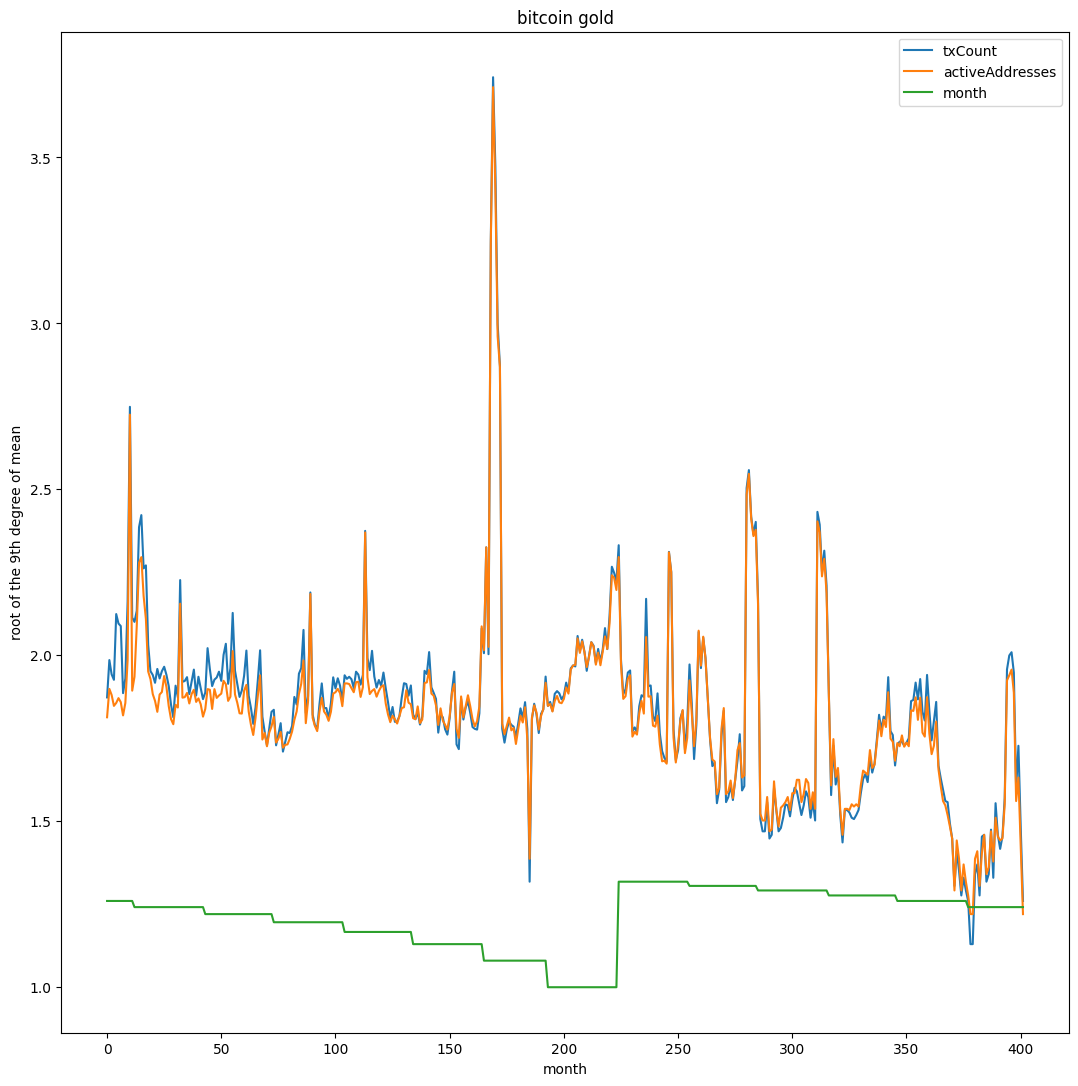

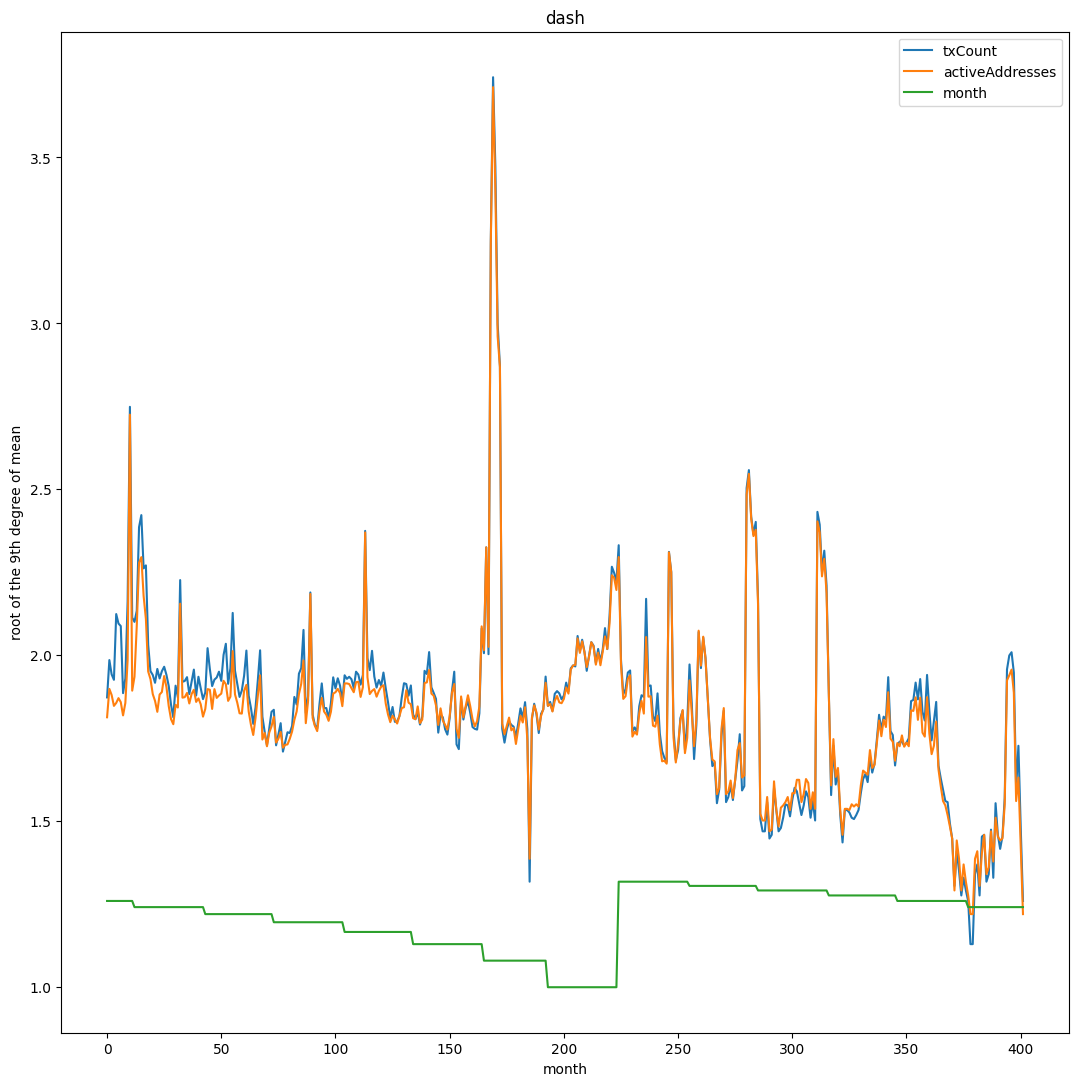

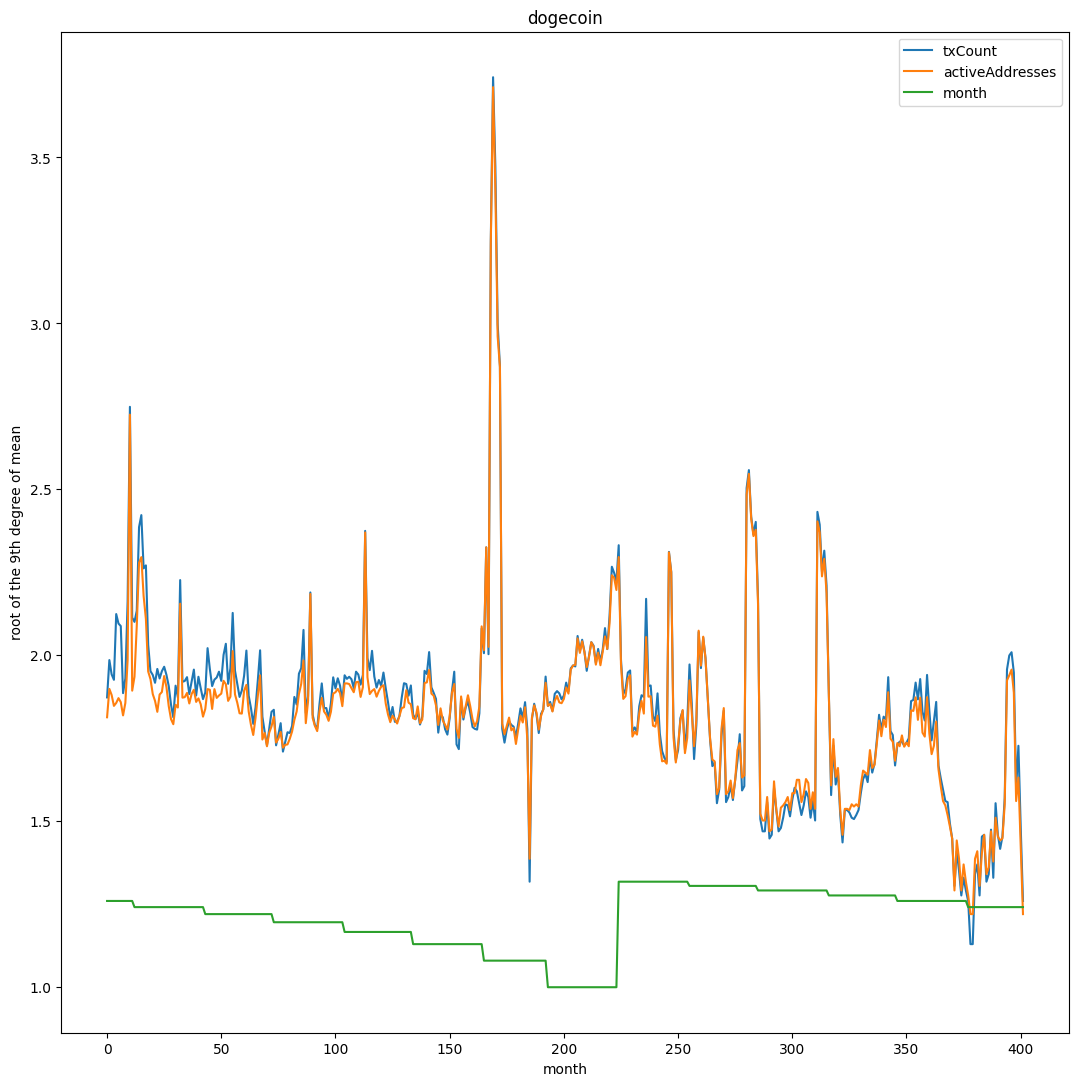

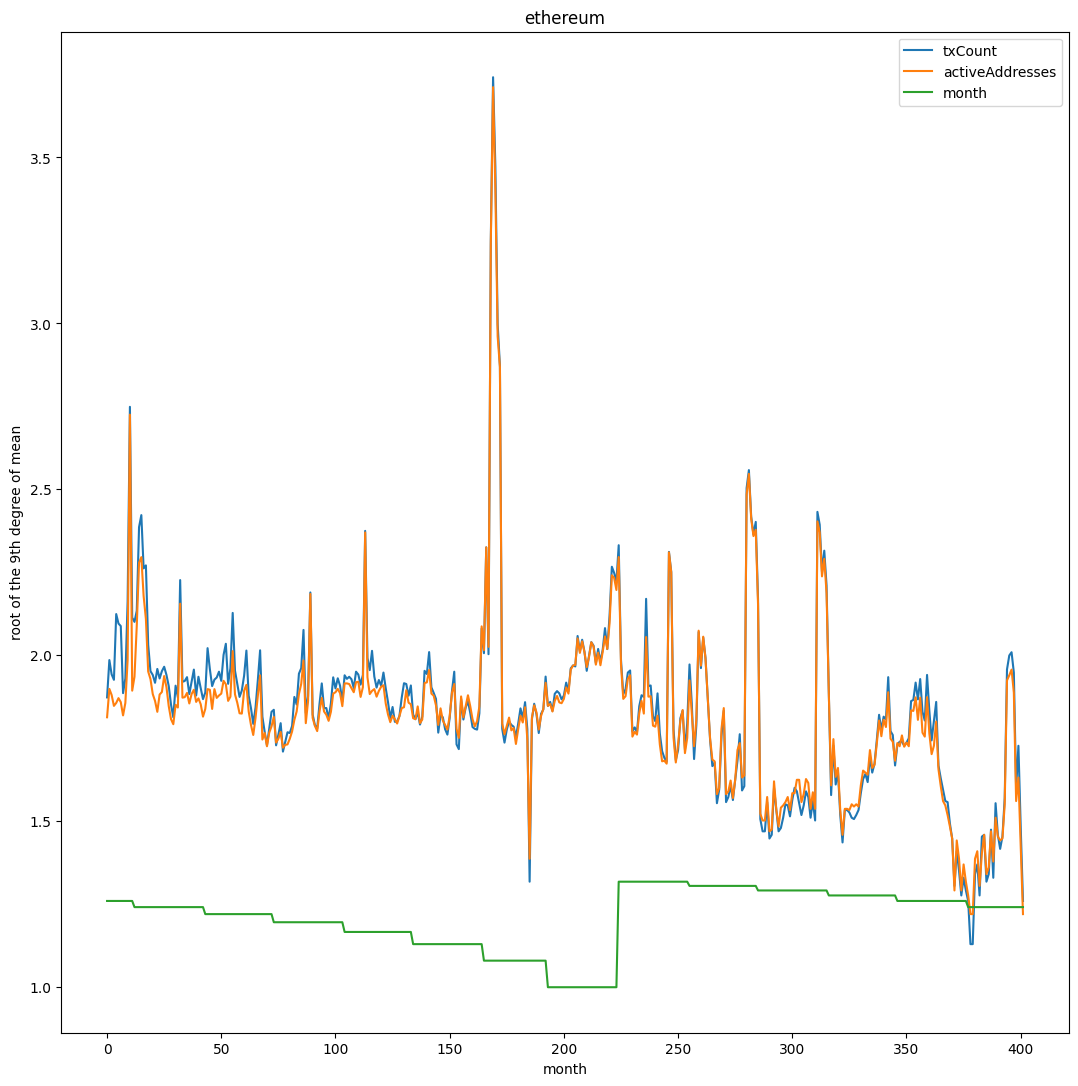

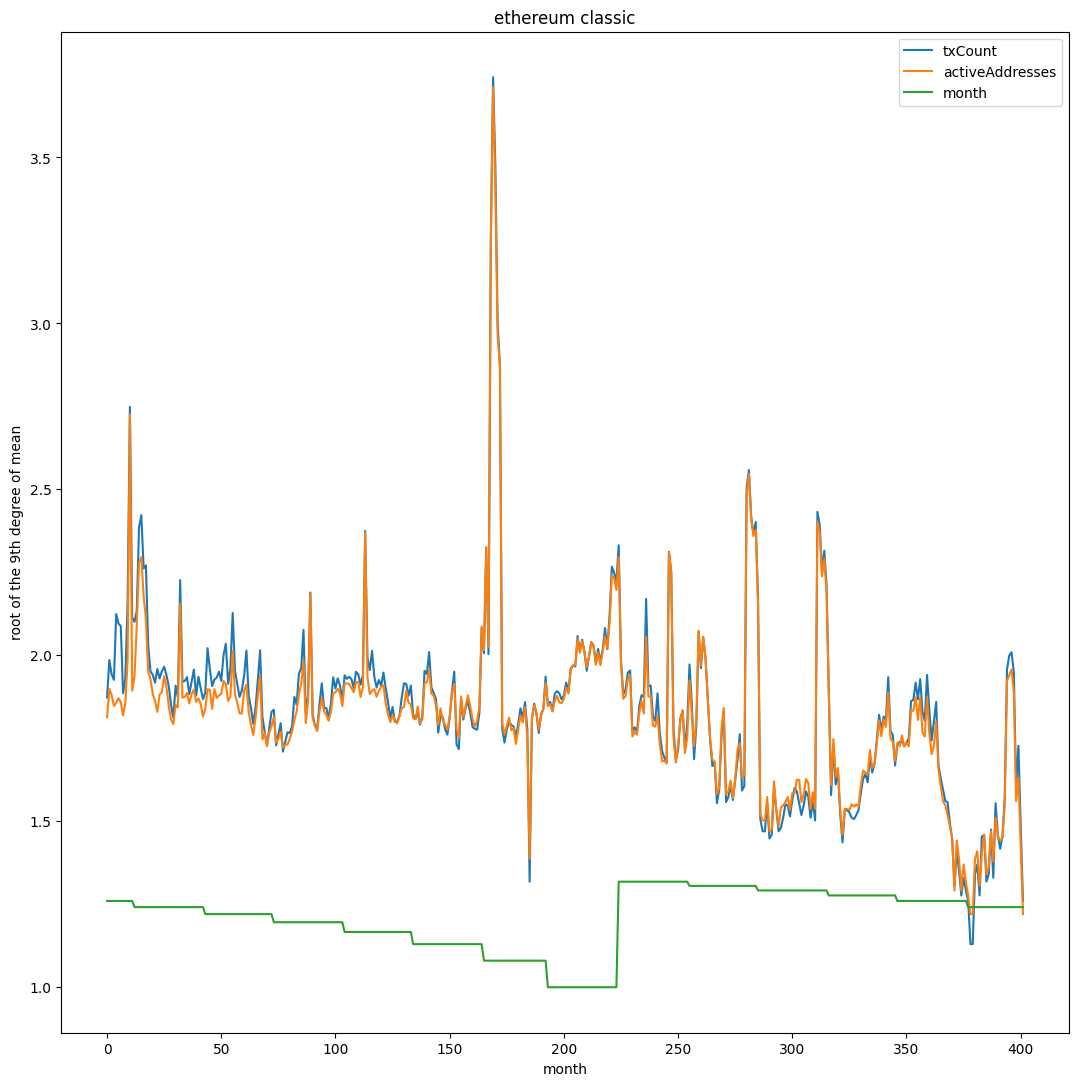

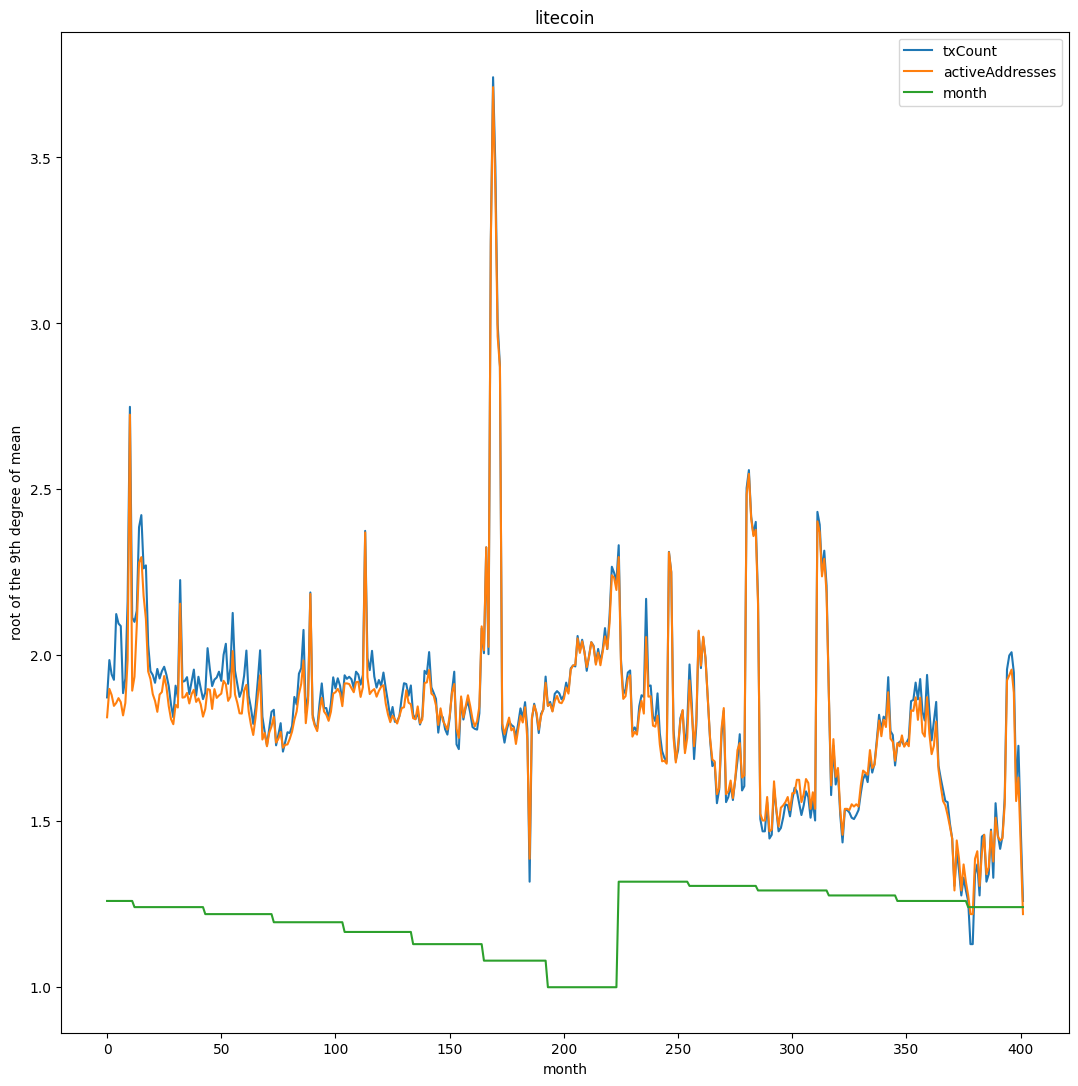

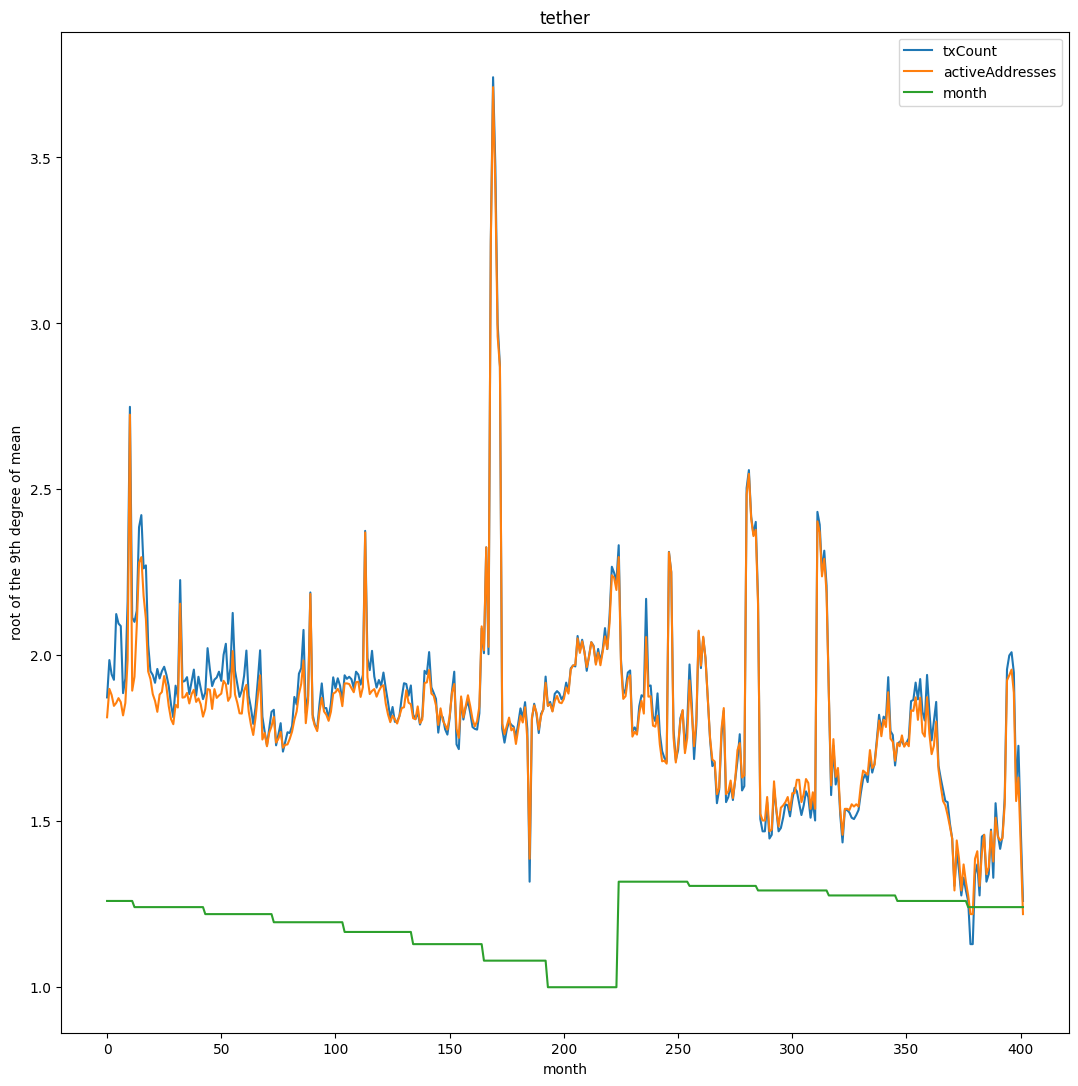

In [40]:
#  visualize_for_month
for i in range(9):
  visualize_for_month(data_per_month, cryptocurrencies[i])

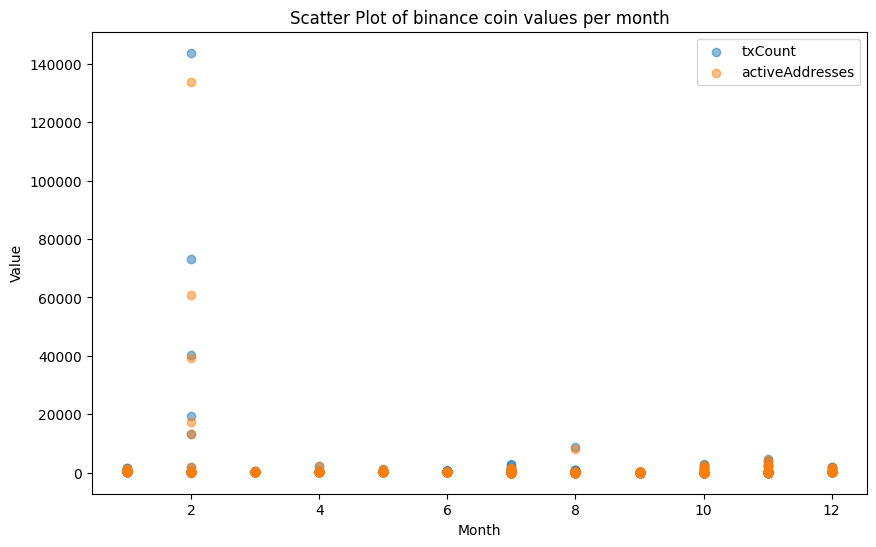

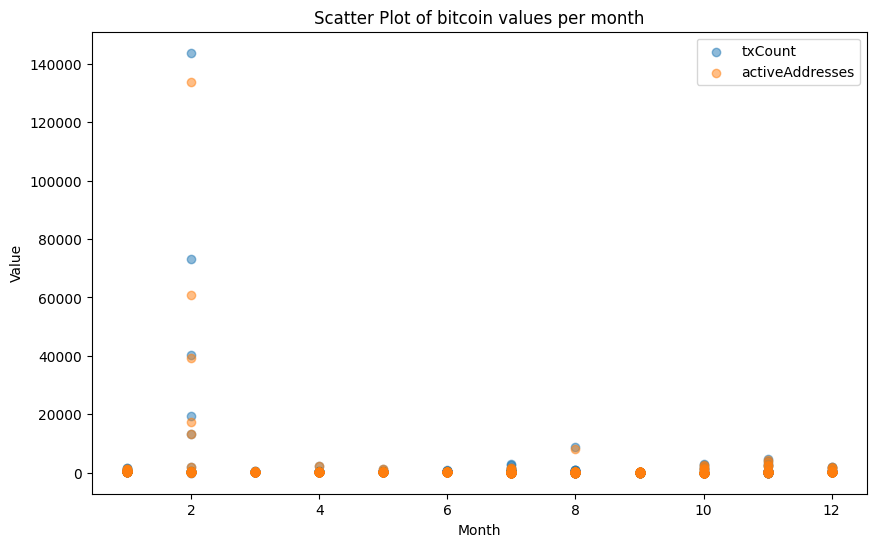

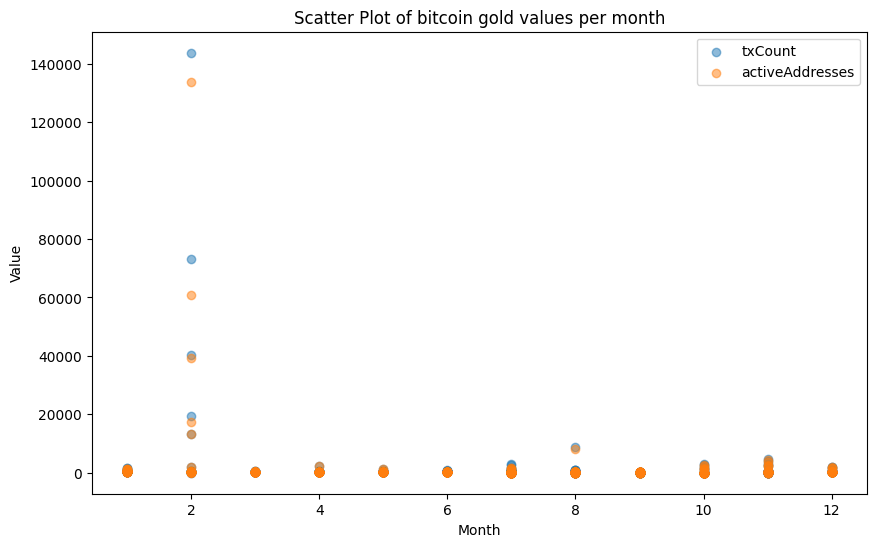

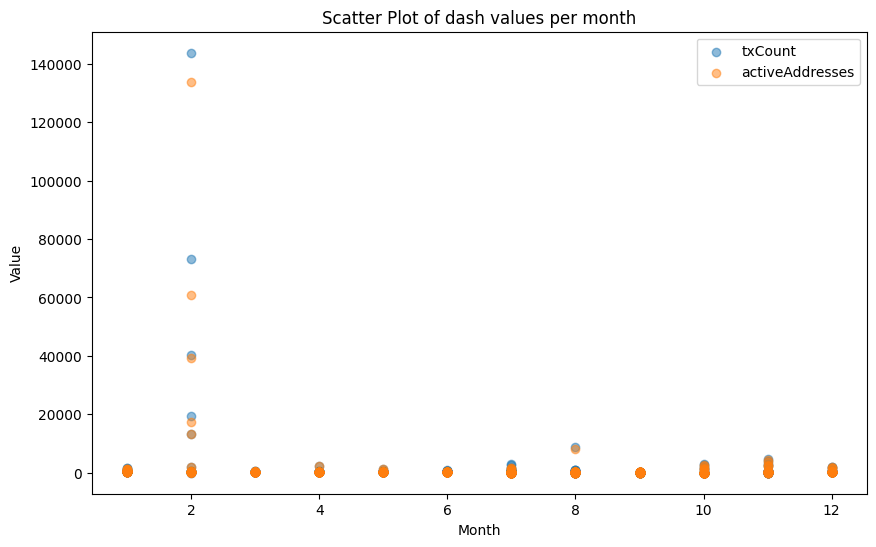

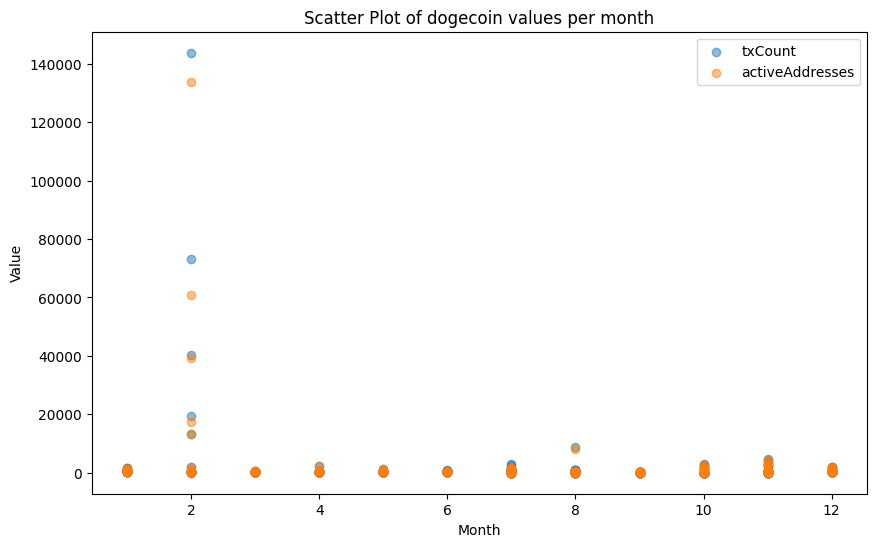

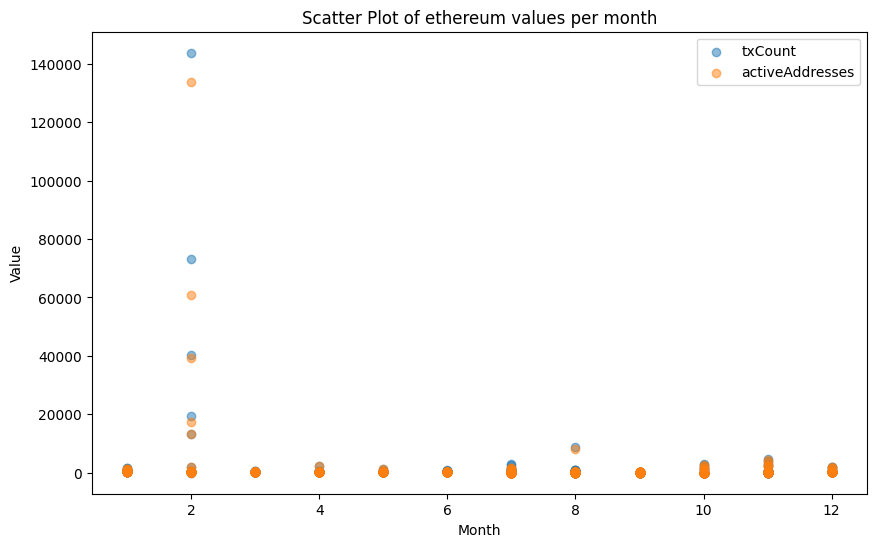

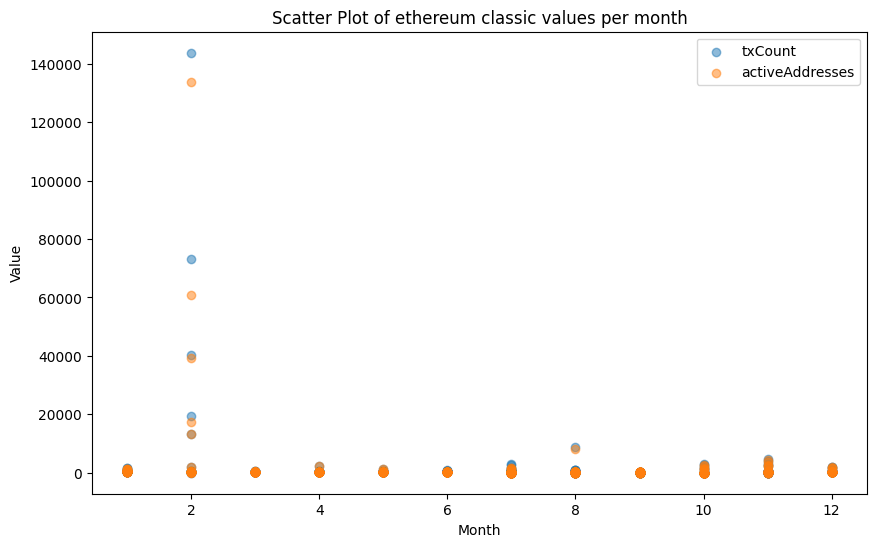

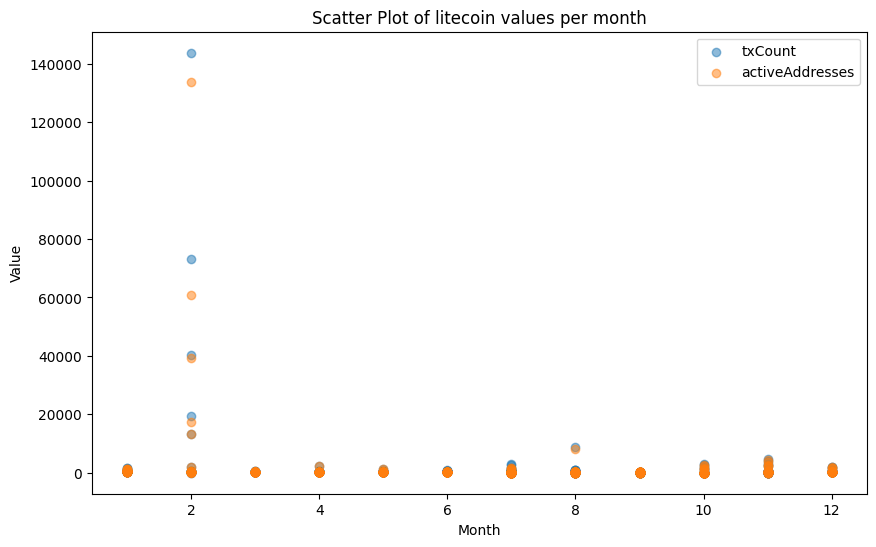

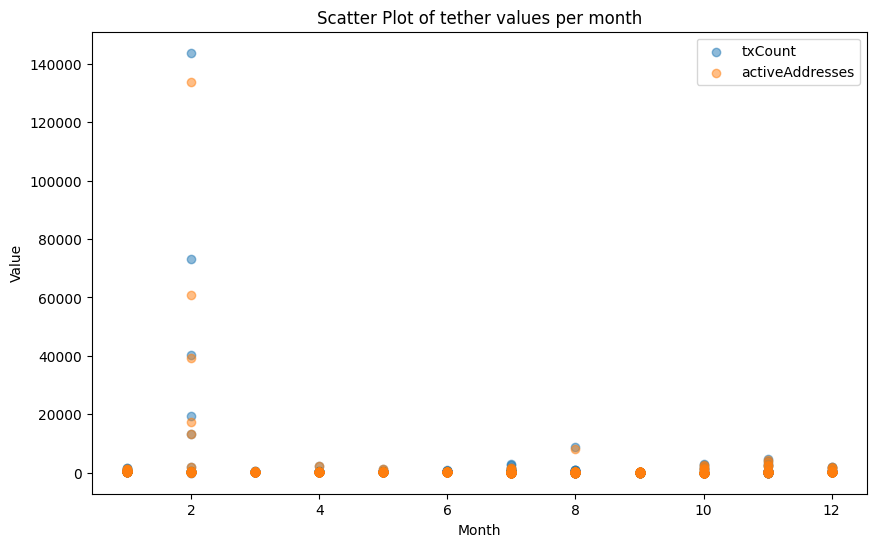

In [36]:
def visualize_scatter_for_month(BC: pd.DataFrame, currency: str):
    plt.figure(figsize=(10, 6))
    for col in BC.columns:
        if col != 'month':  # Exclude the 'month' column from the scatter plot
            plt.scatter(BC['month'], BC[col], label=col, alpha=0.5) # Use scatter plot

    plt.xlabel("Month")
    plt.ylabel("Value")
    plt.title(f"Scatter Plot of {currency} values per month")
    plt.legend()
    plt.show()

# Assuming you have your 'data_per_month' DataFrame and 'cryptocurrencies' list
for i in range(len(cryptocurrencies)):
  visualize_scatter_for_month(data_per_month, cryptocurrencies[i])


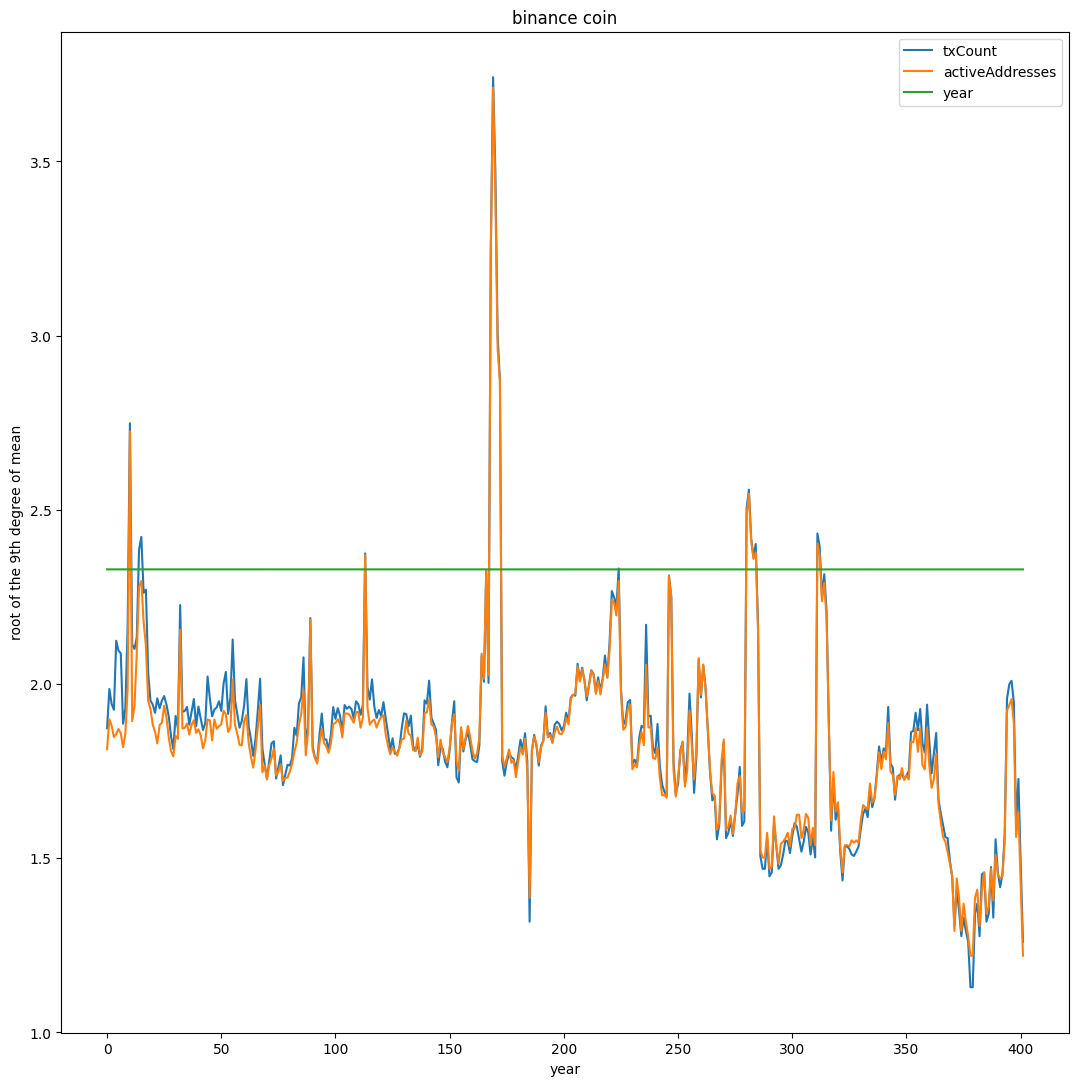

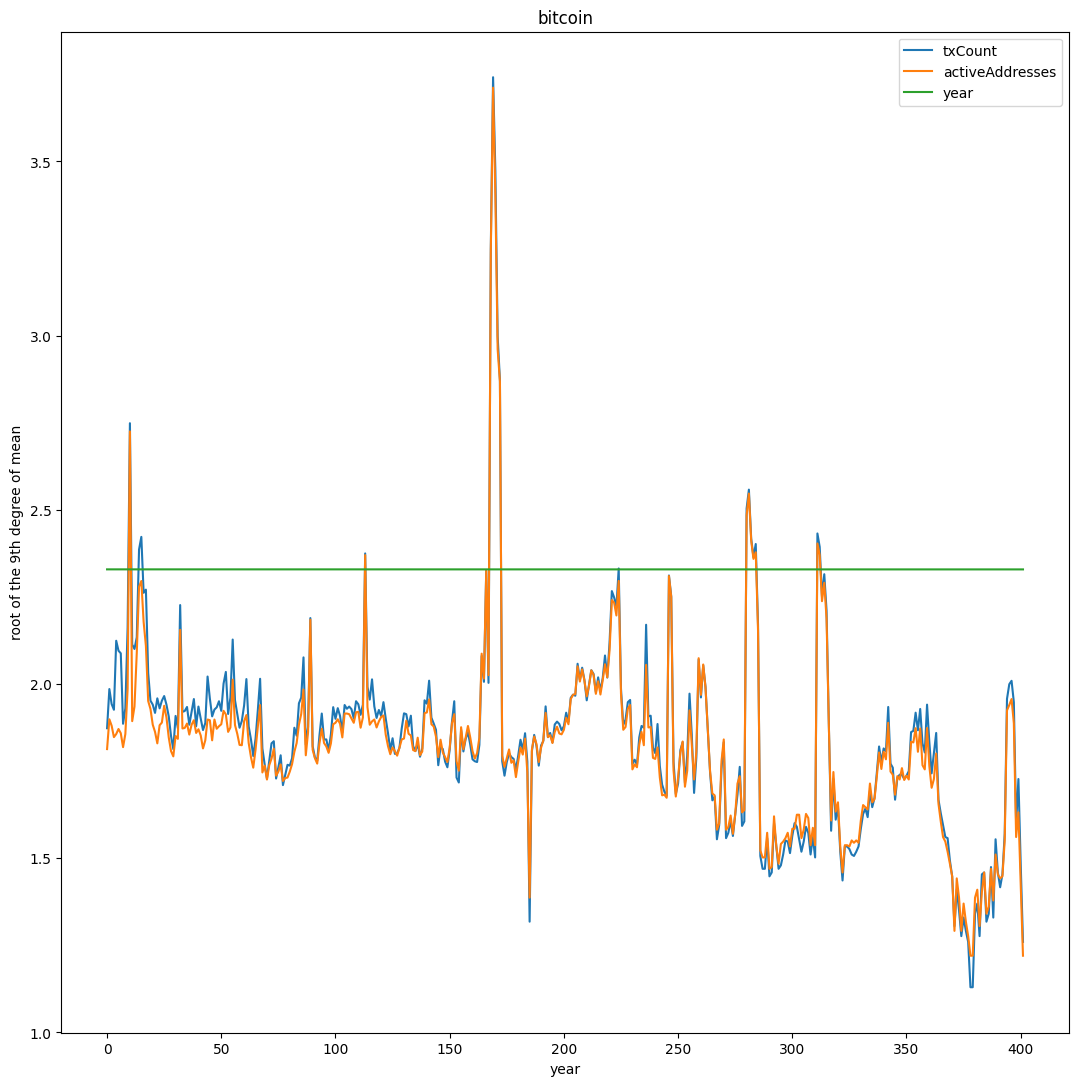

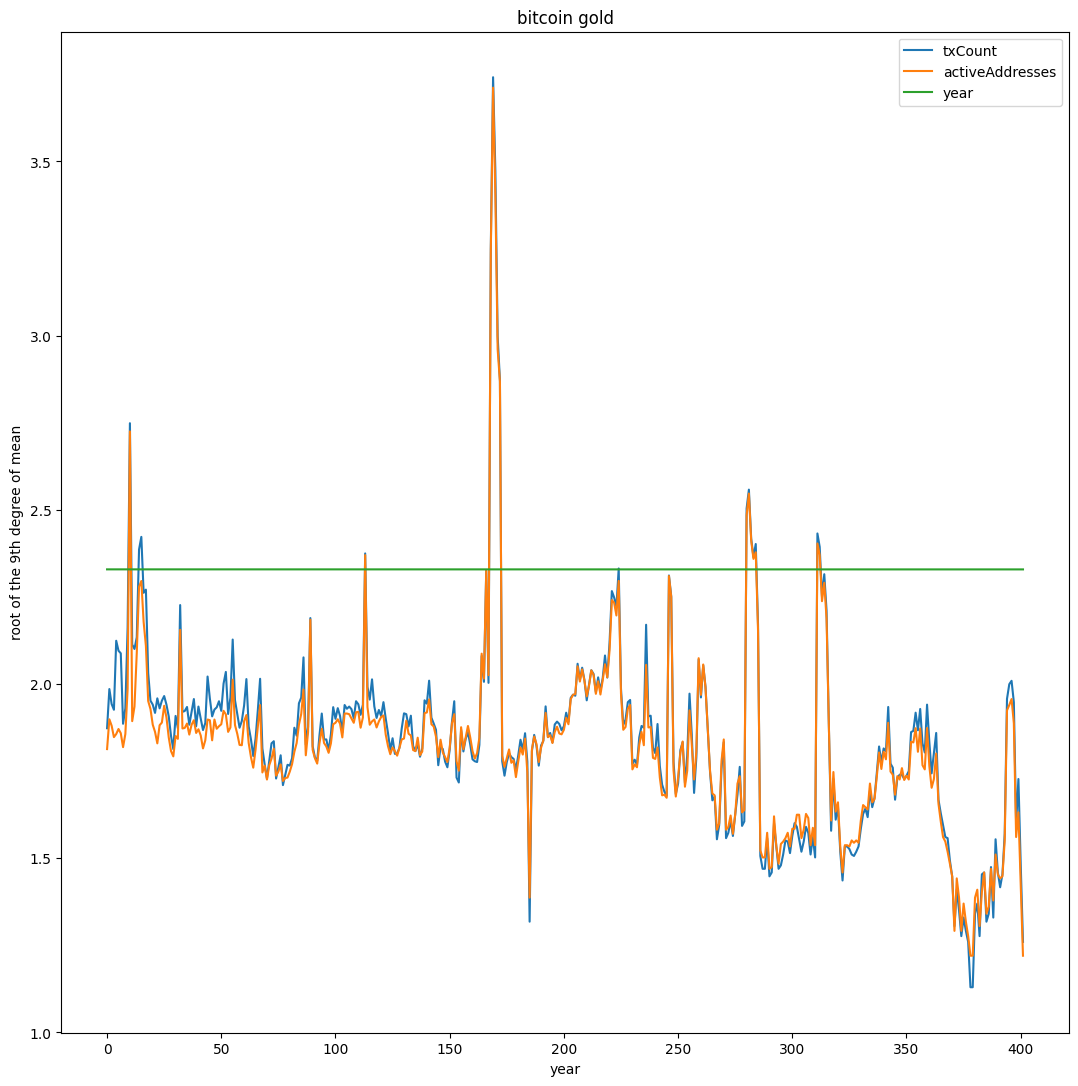

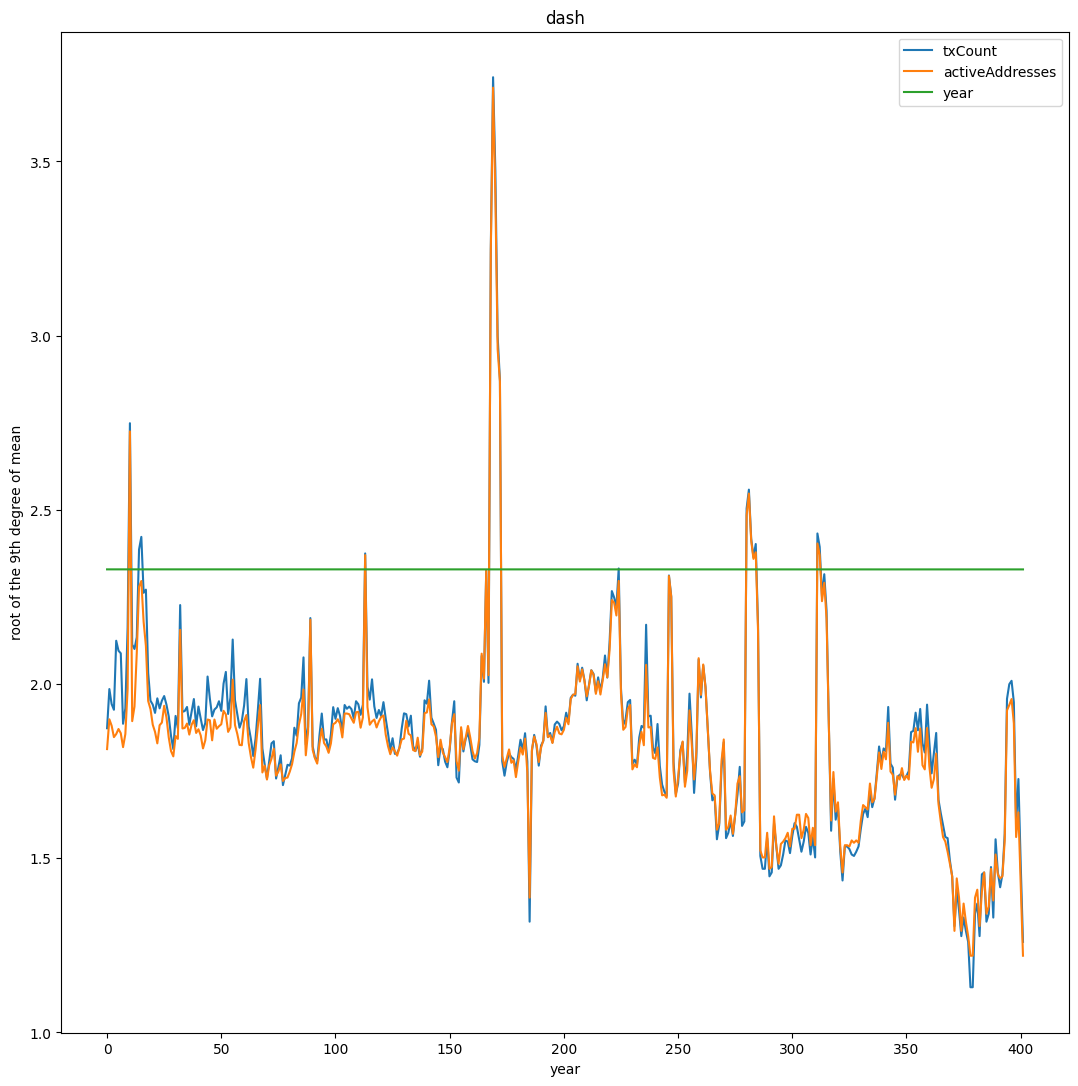

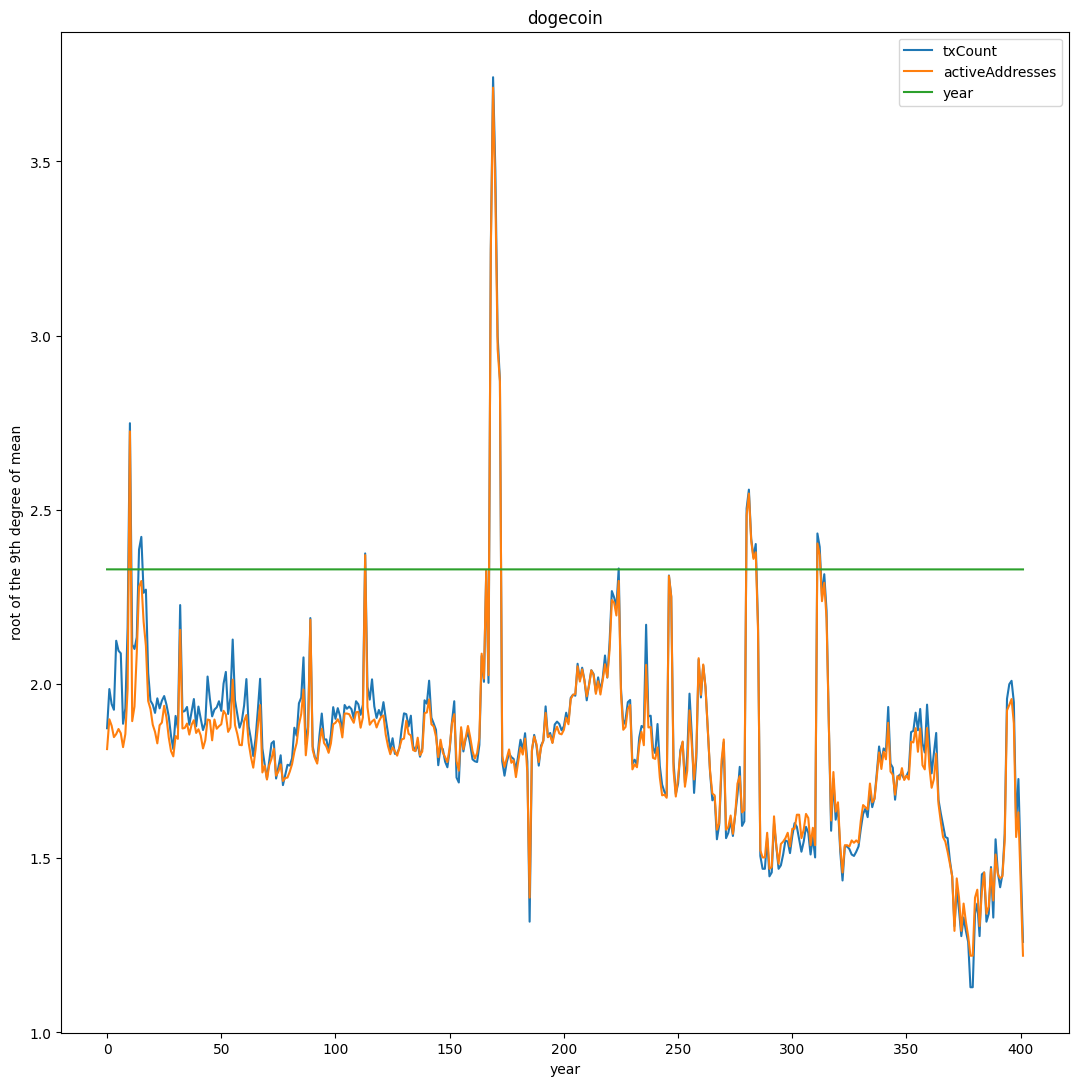

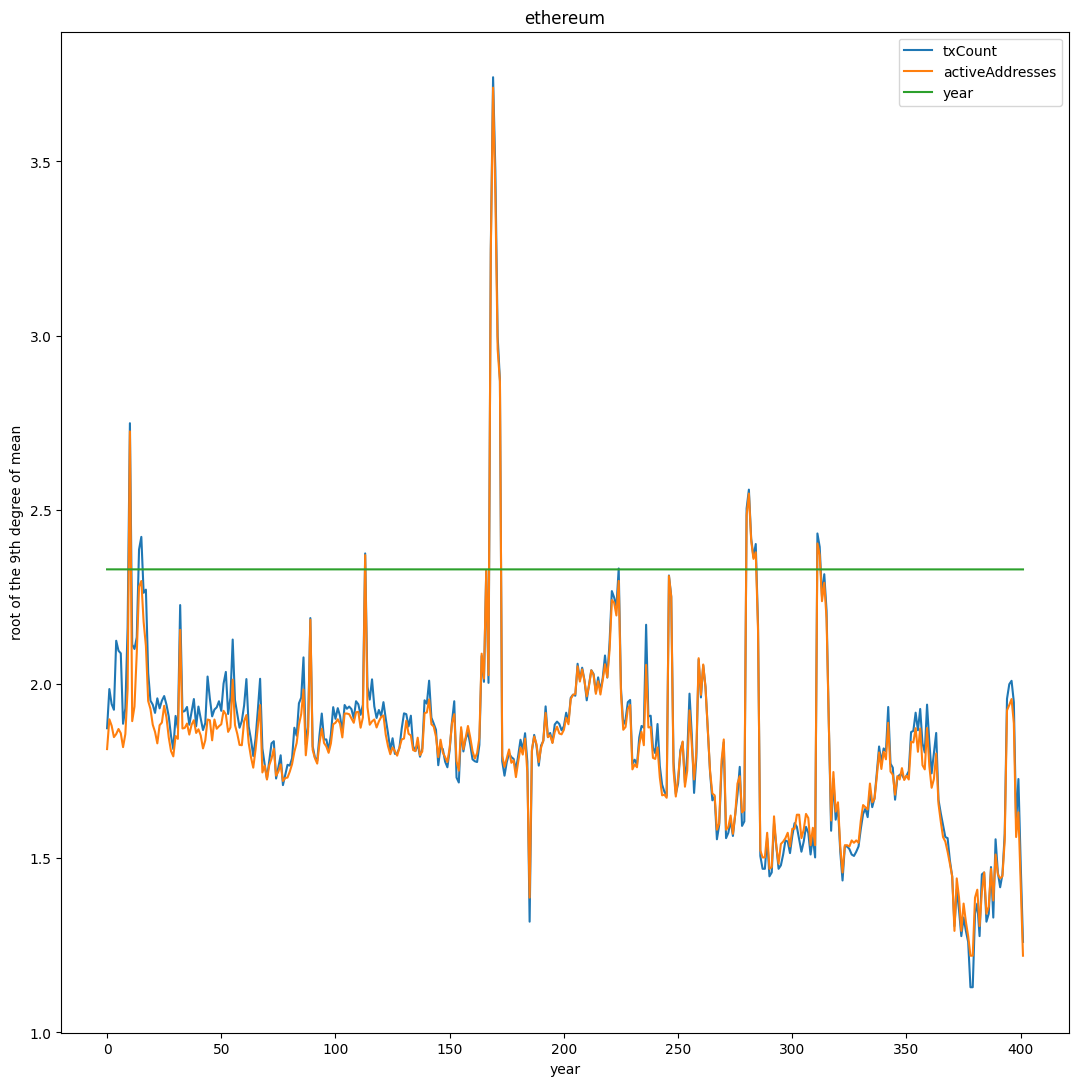

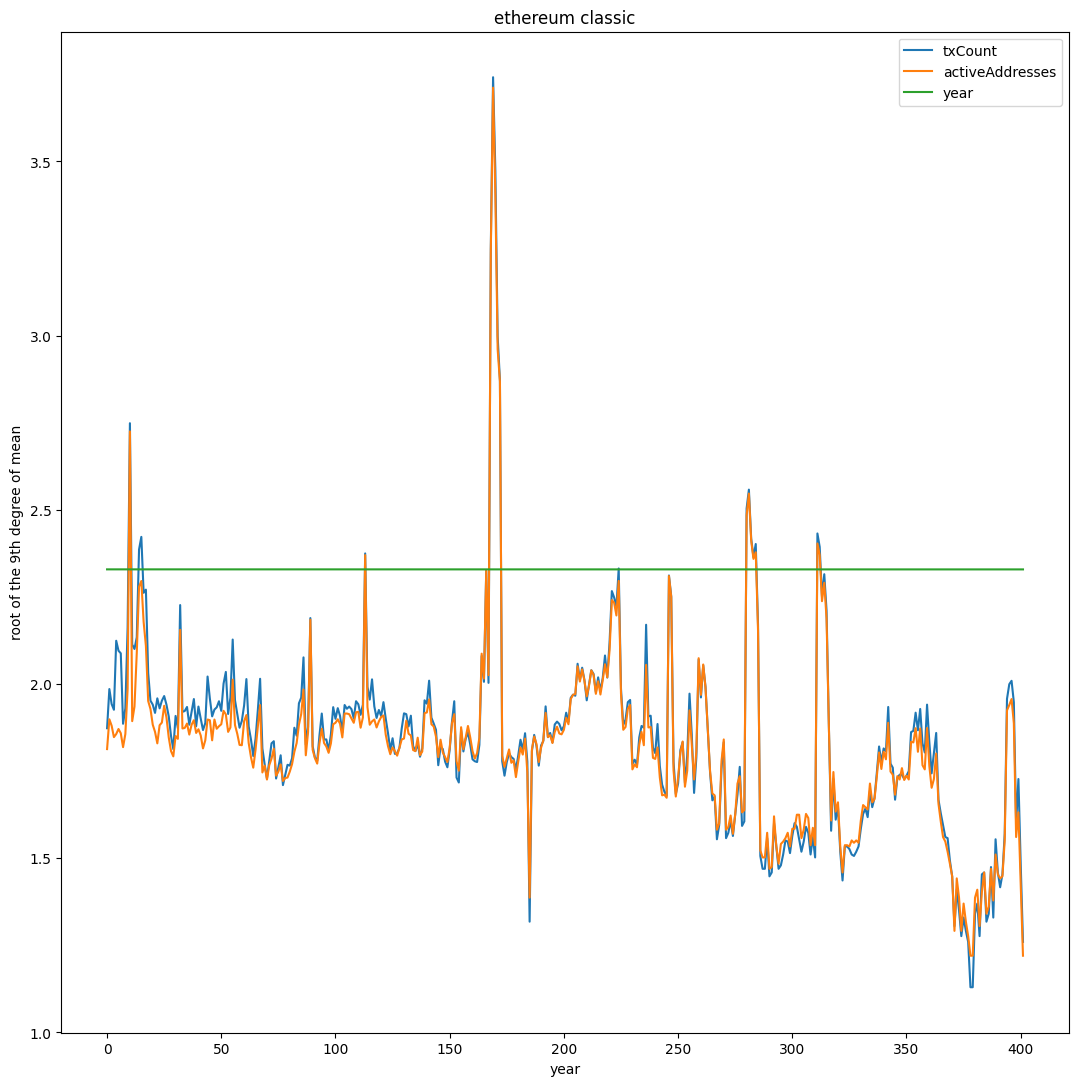

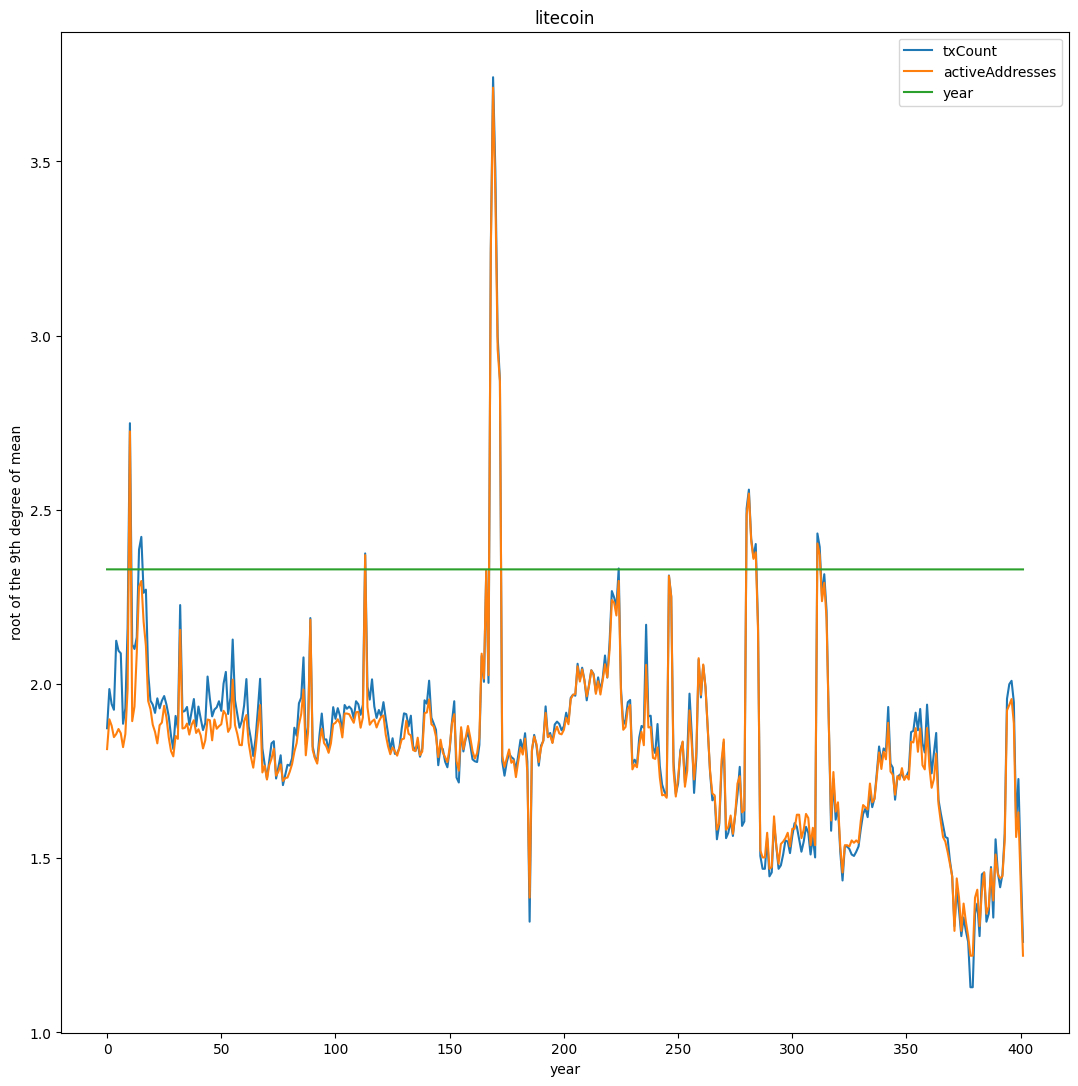

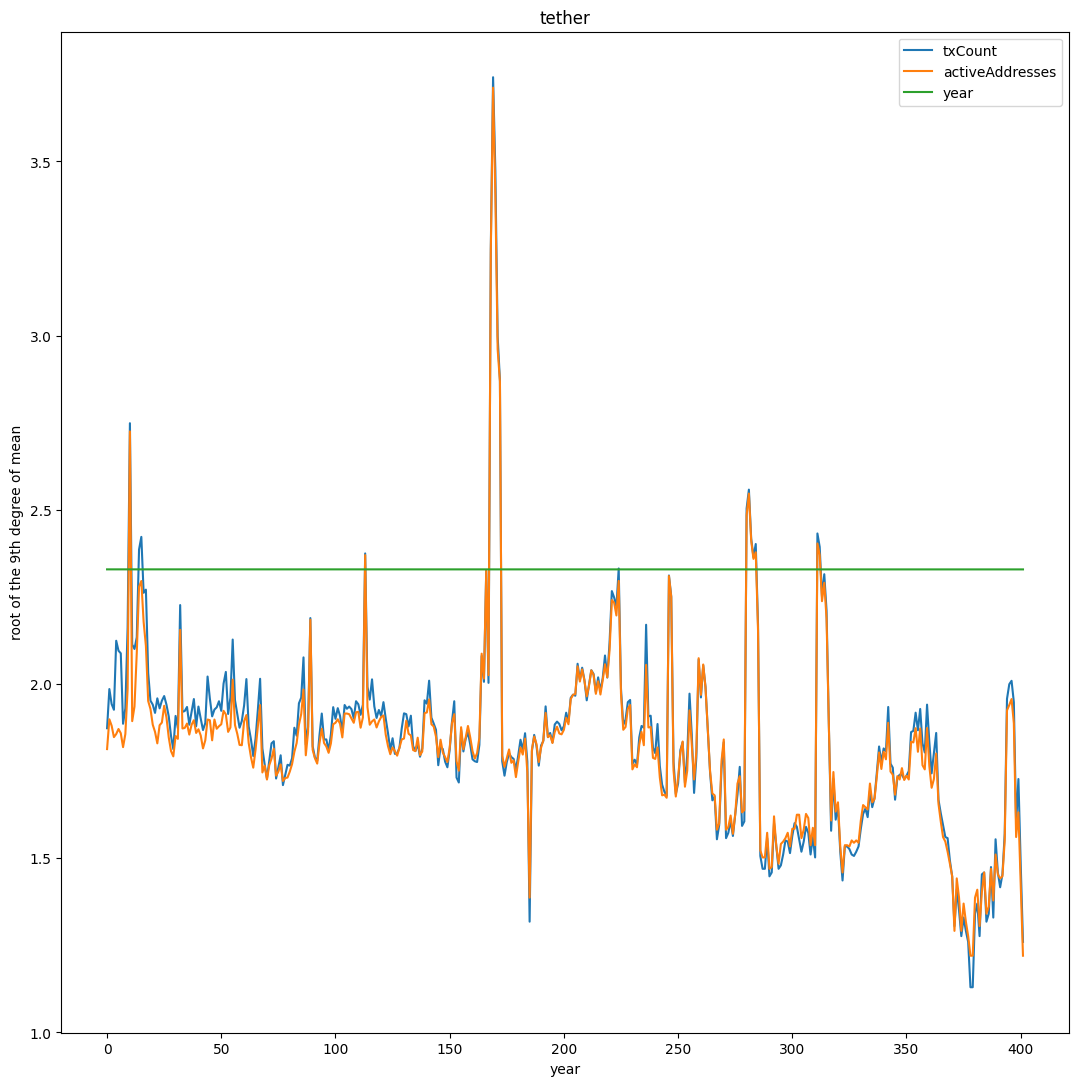

In [39]:
#  visualize_for_year
for i in range(9):
  visualize_for_year(data_per_year, cryptocurrencies[i])

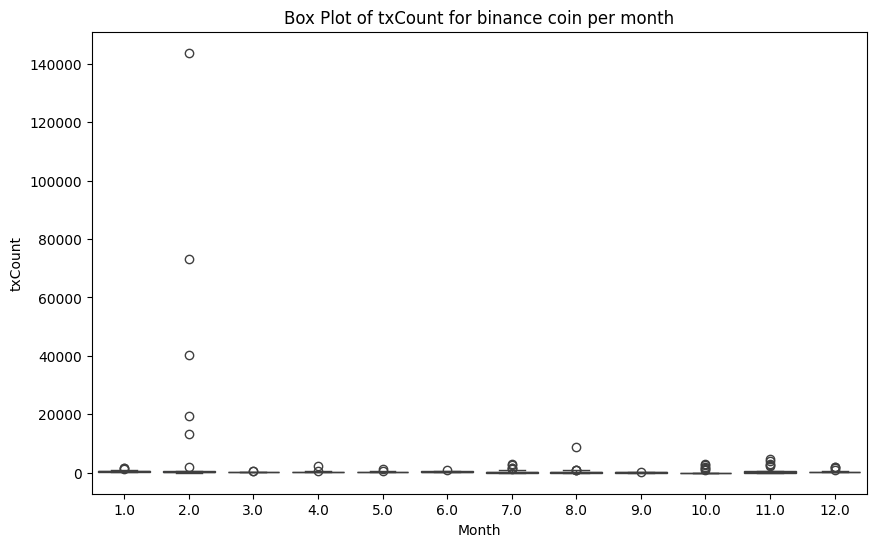

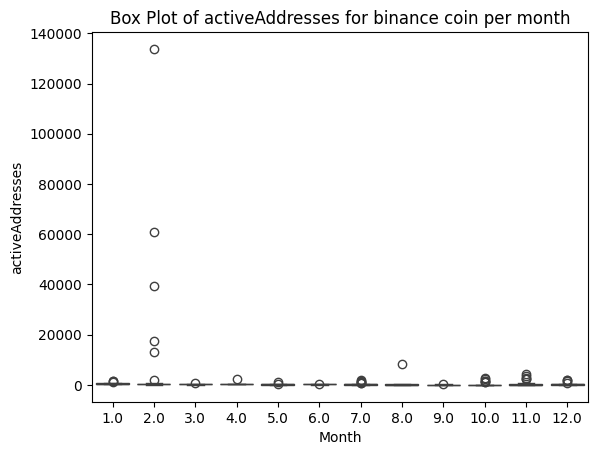

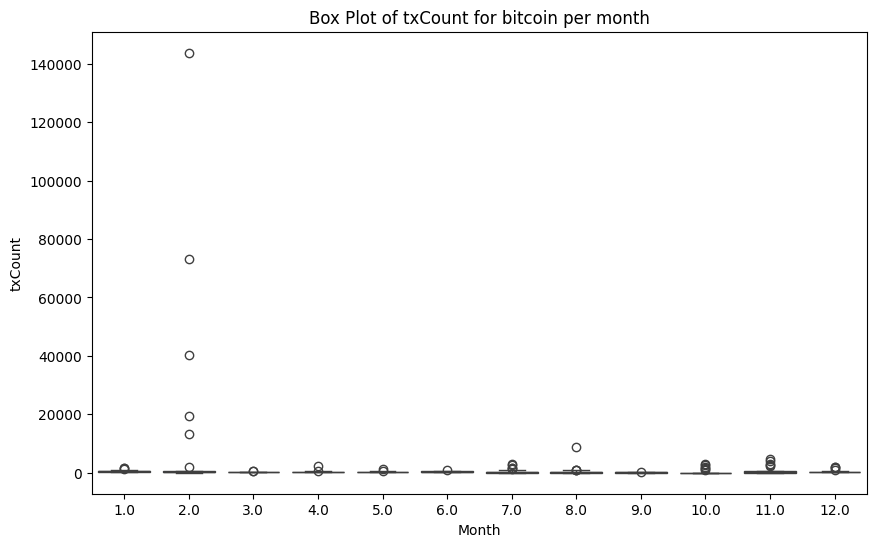

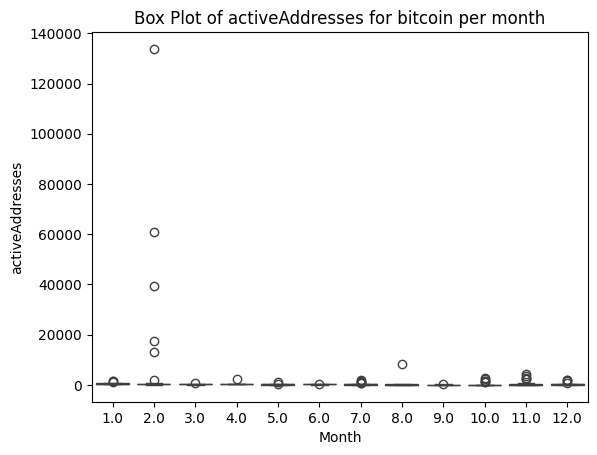

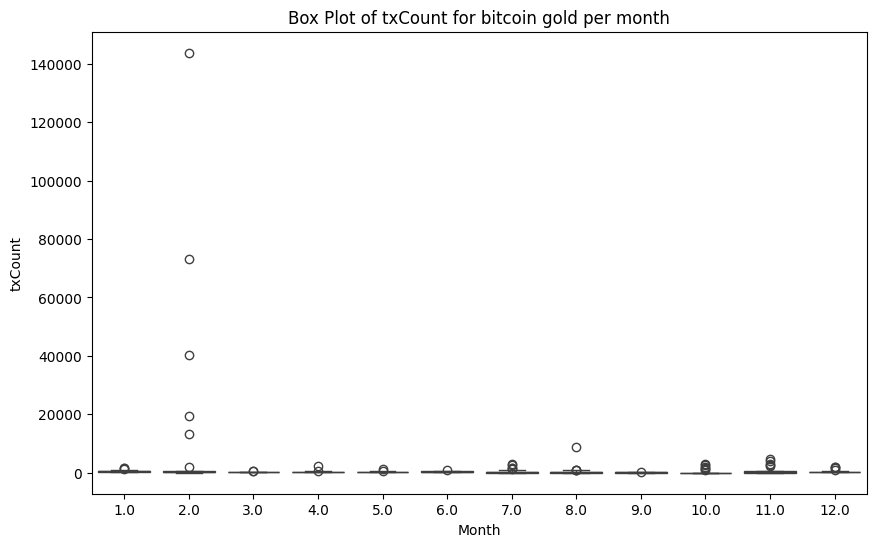

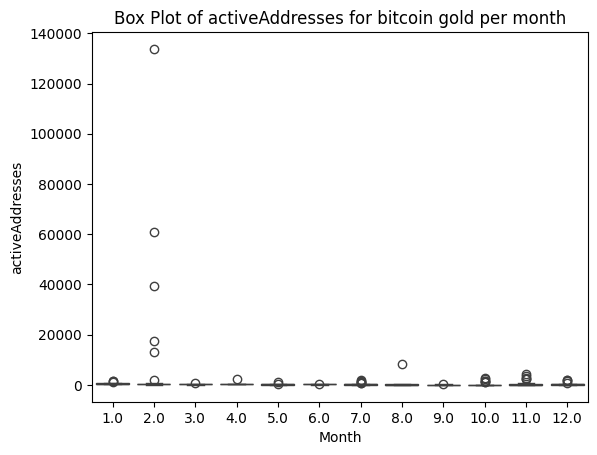

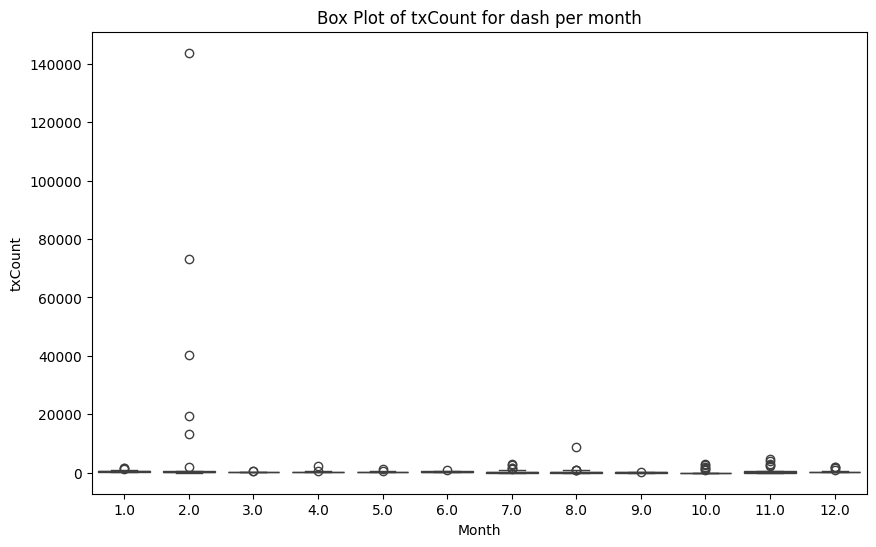

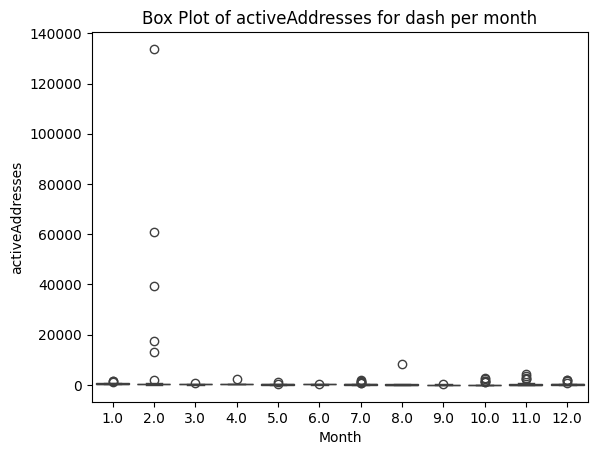

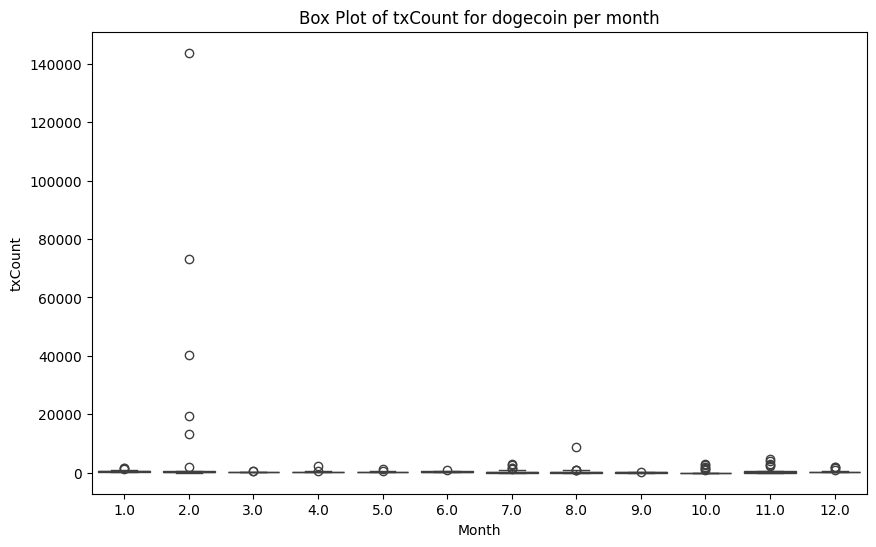

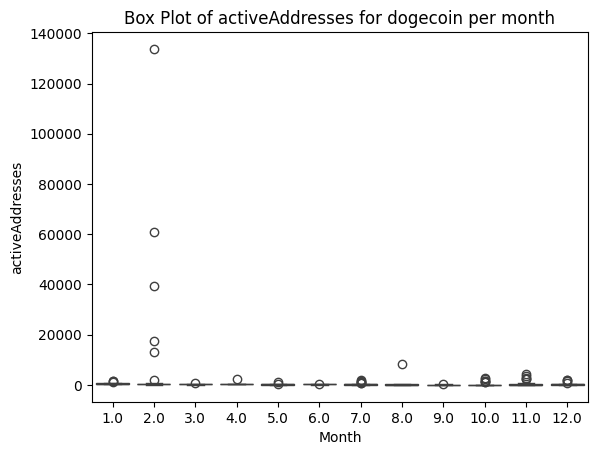

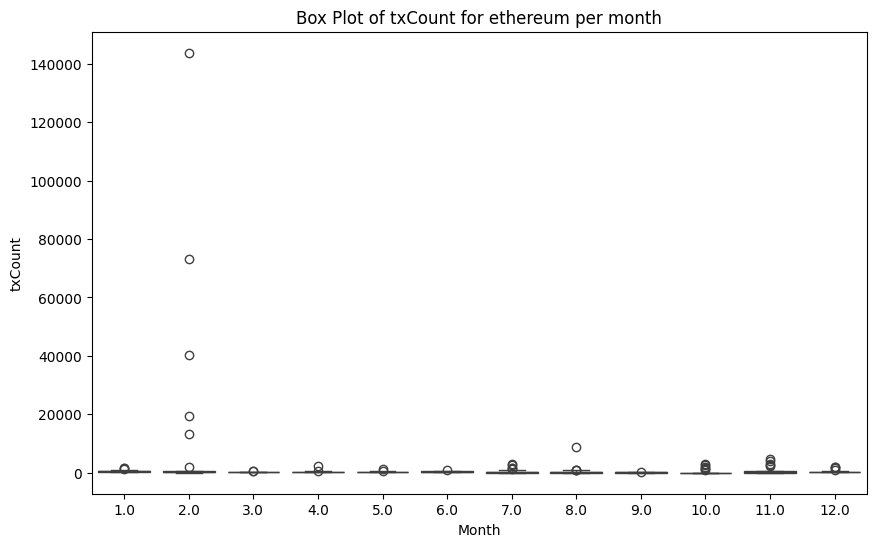

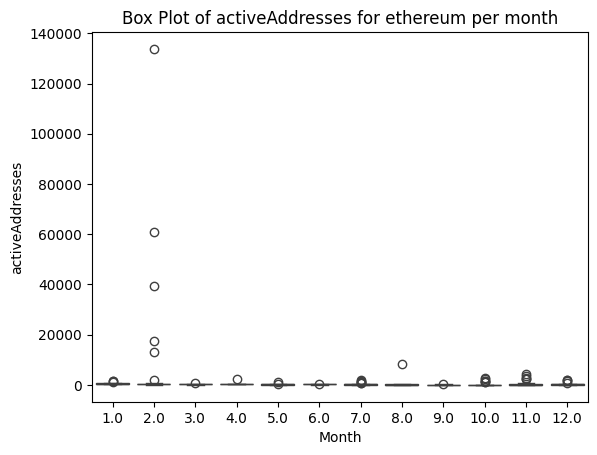

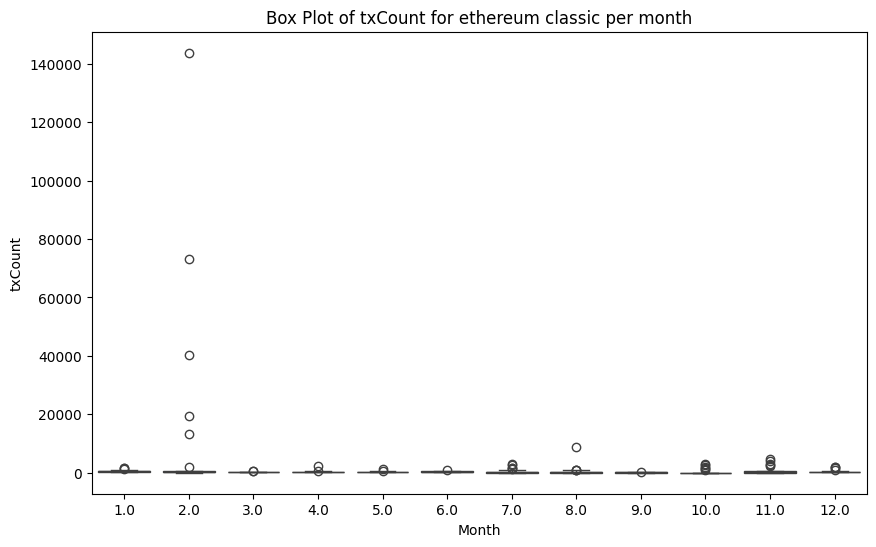

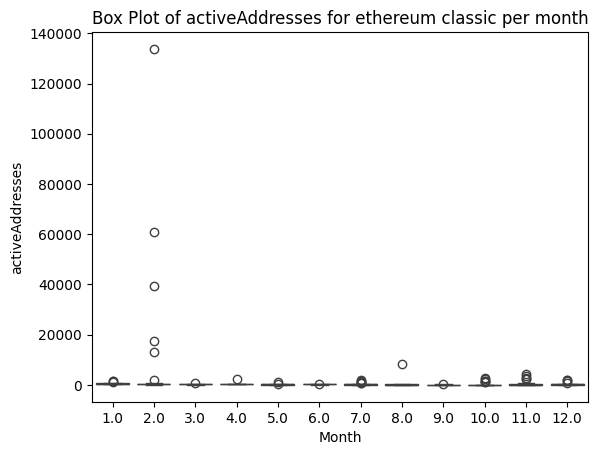

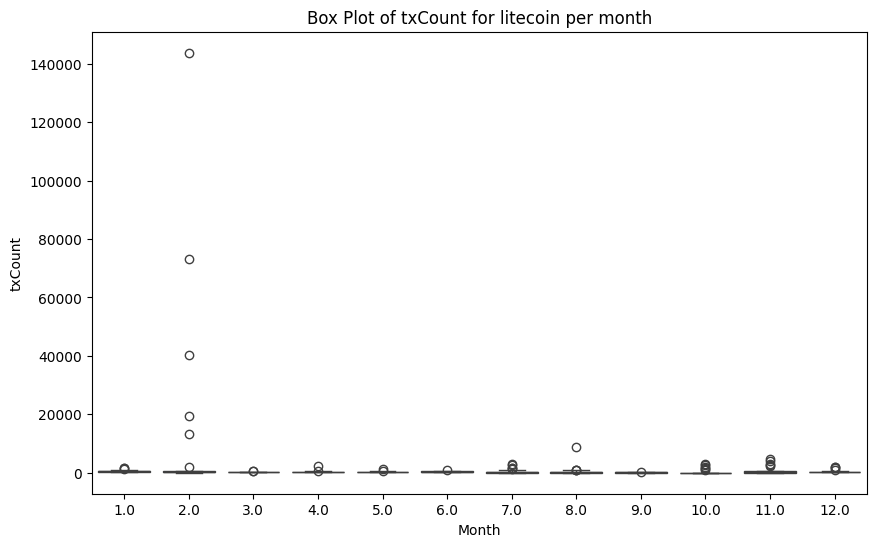

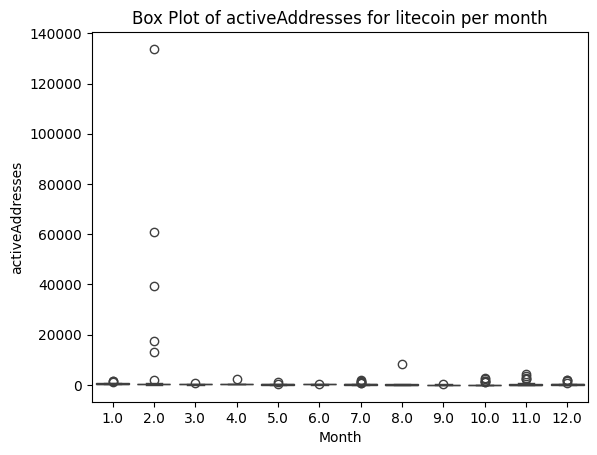

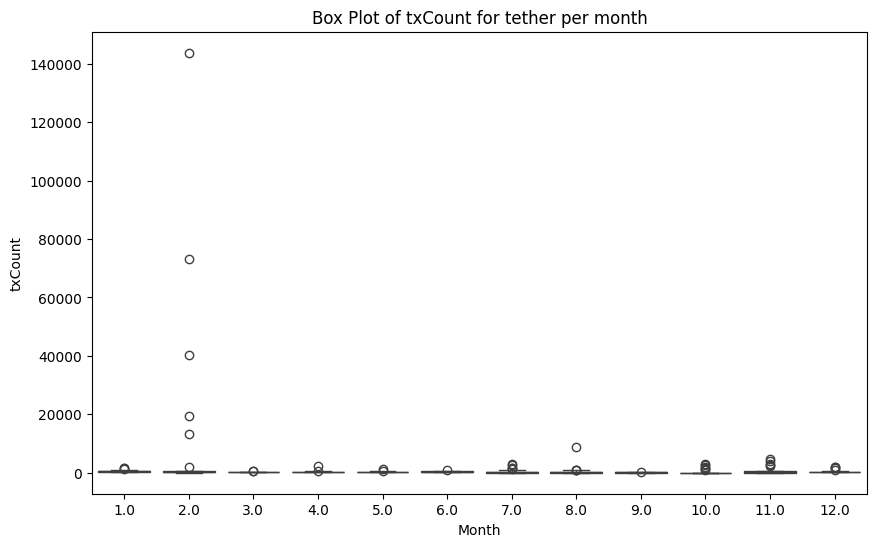

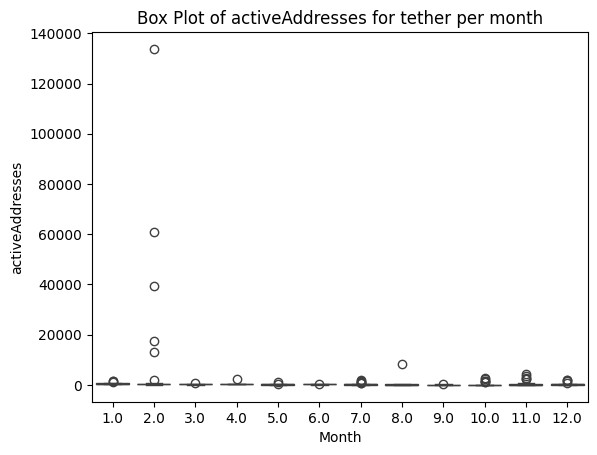

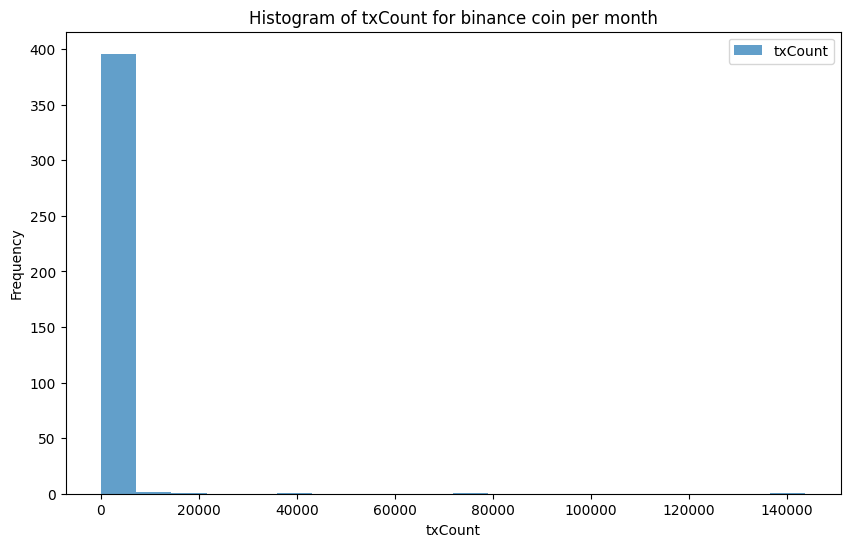

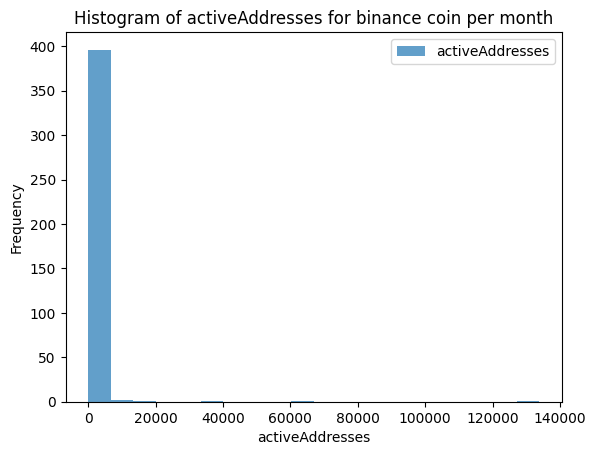

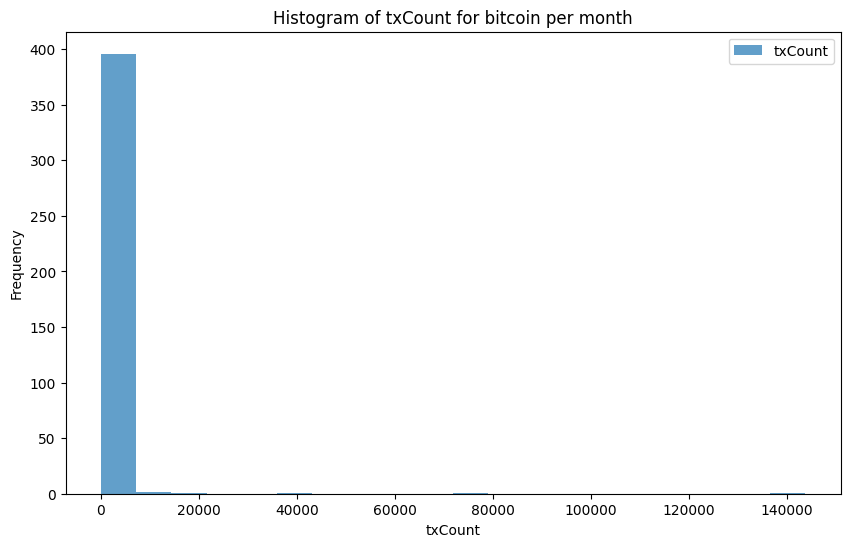

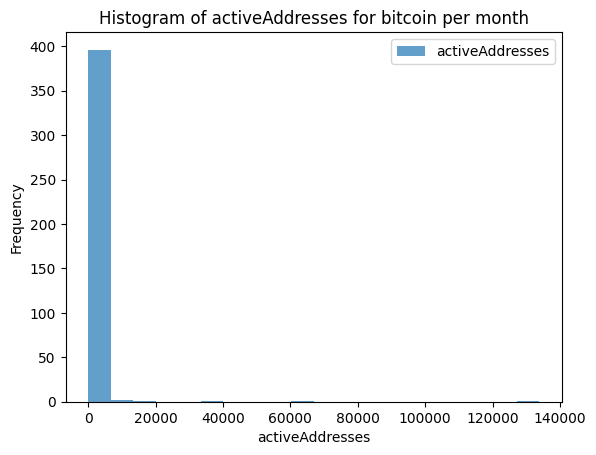

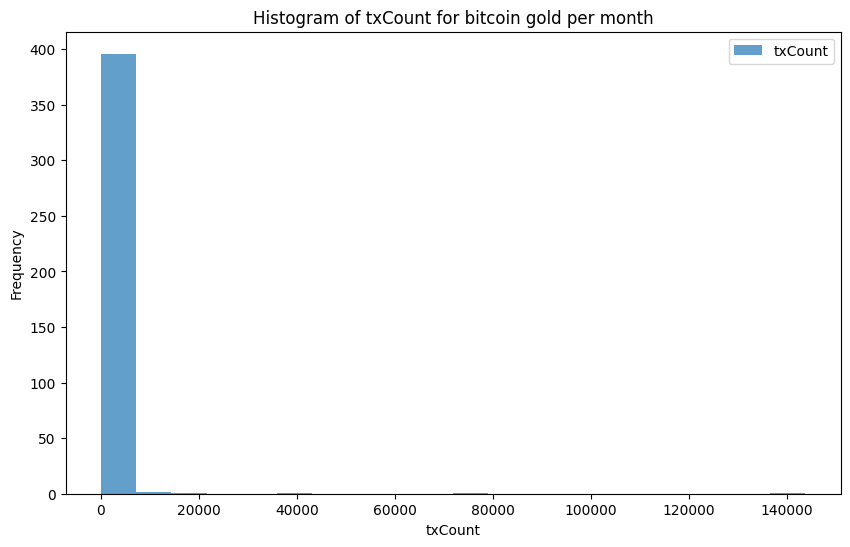

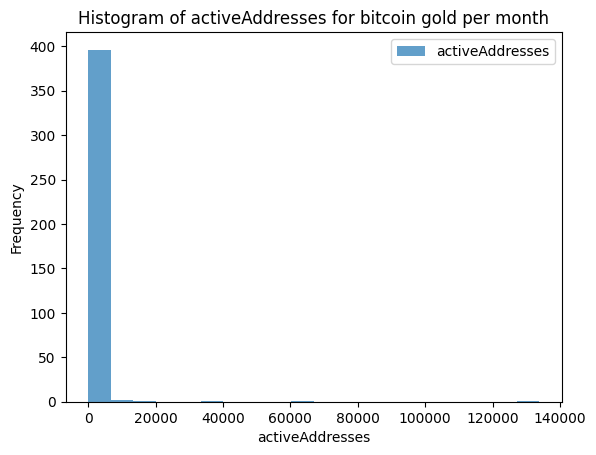

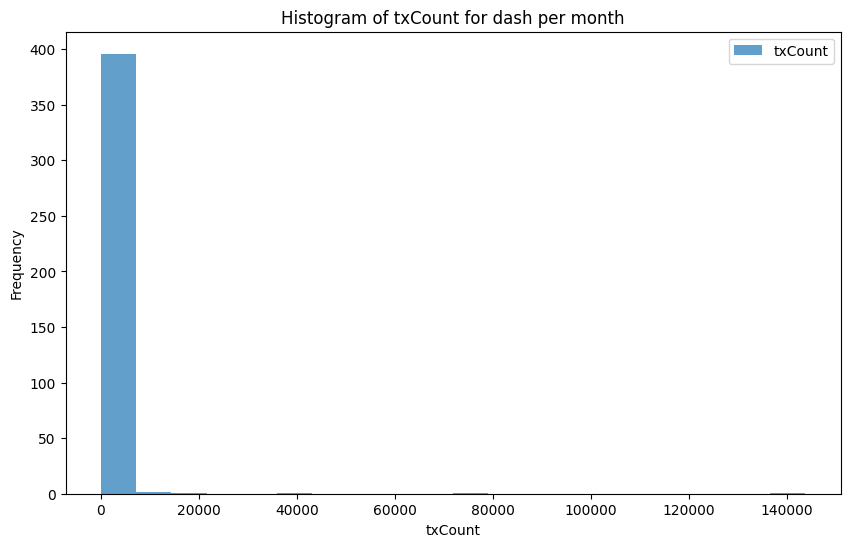

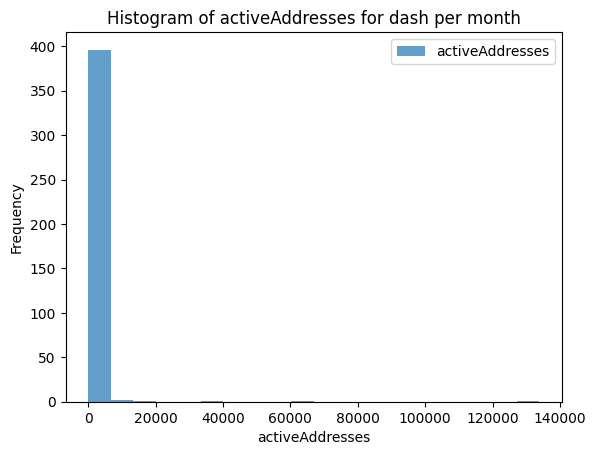

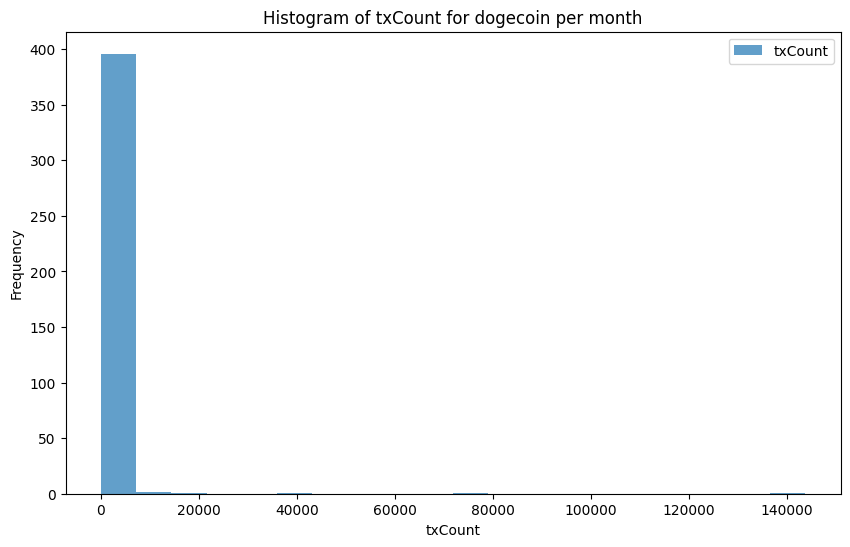

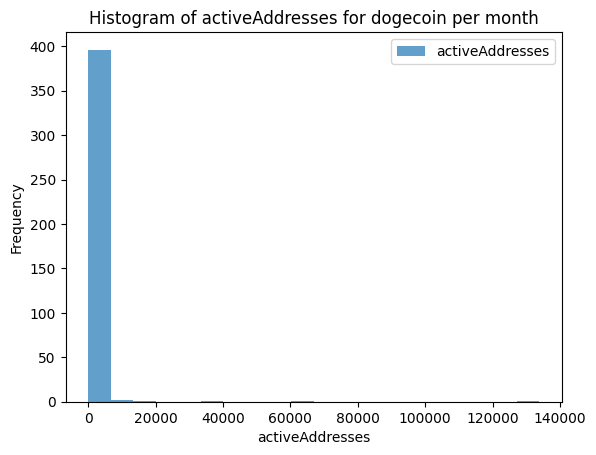

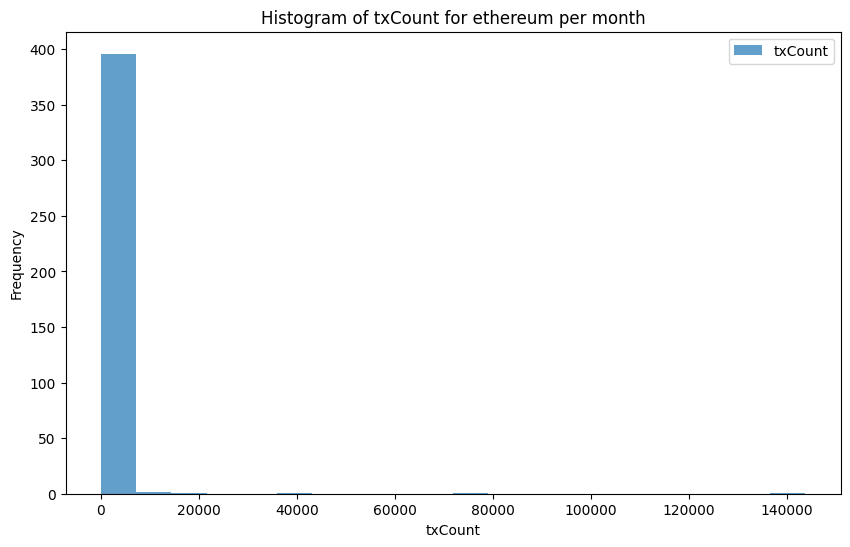

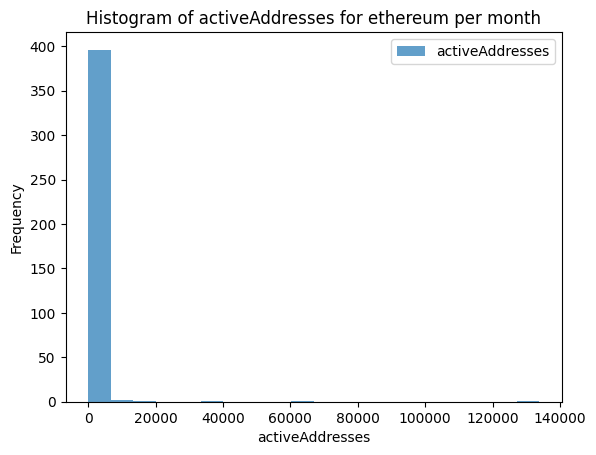

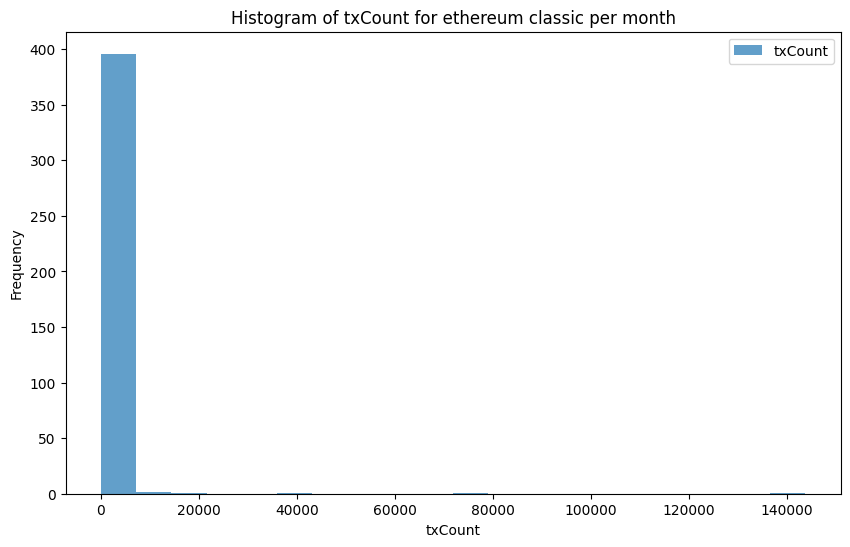

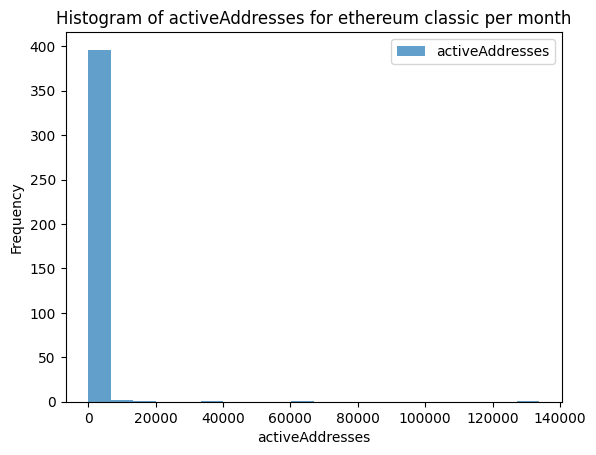

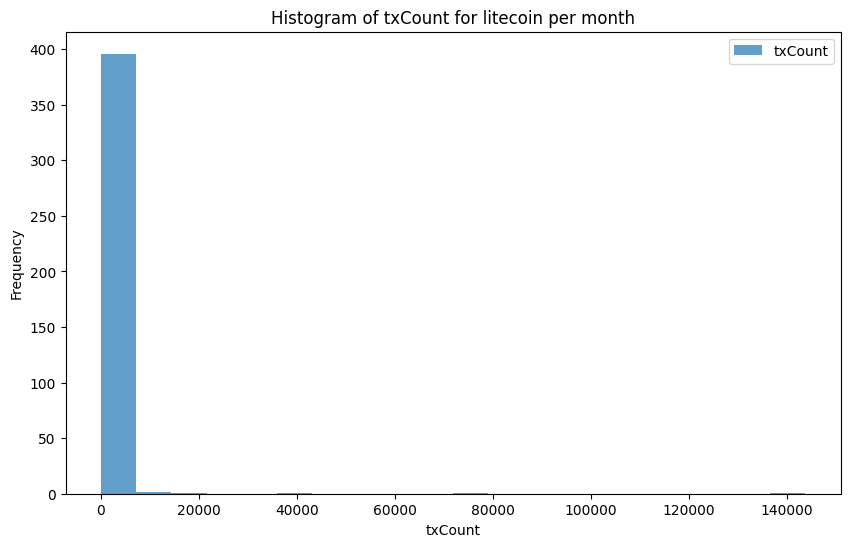

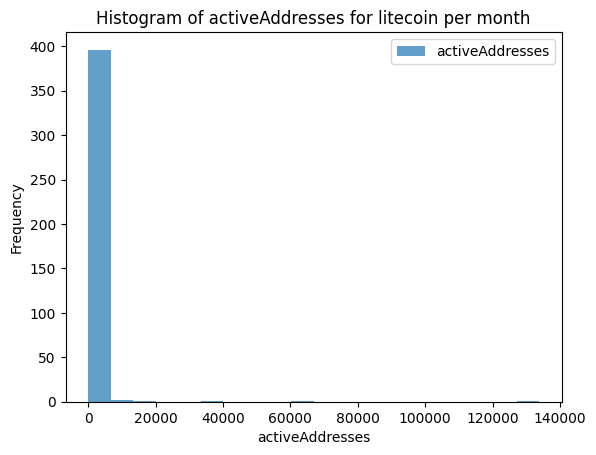

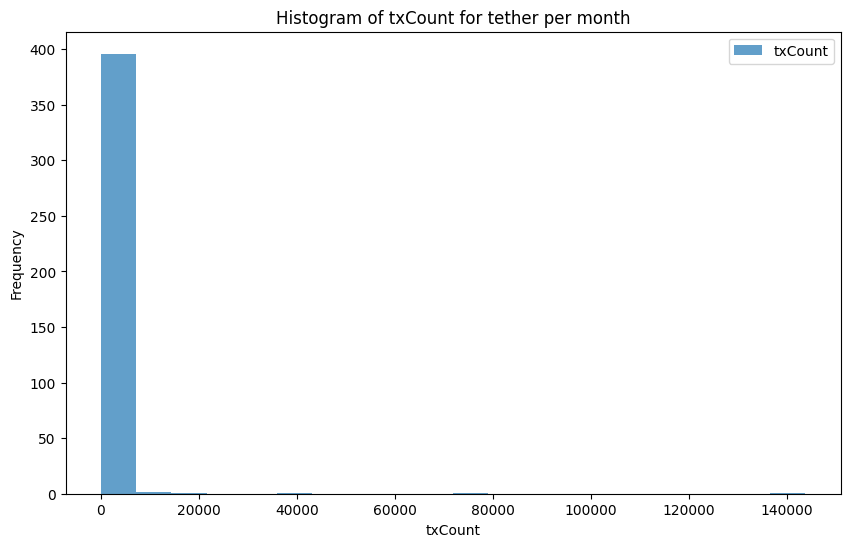

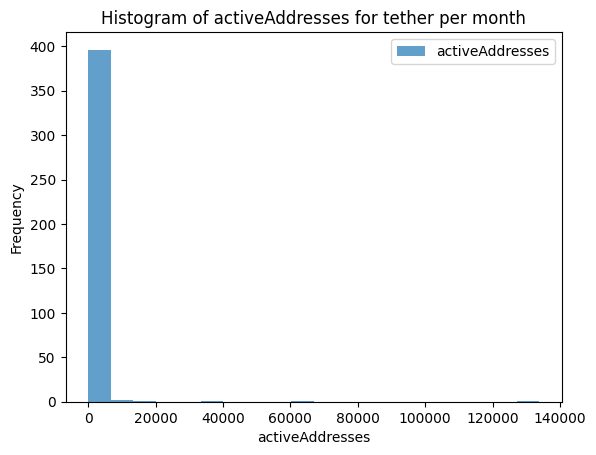

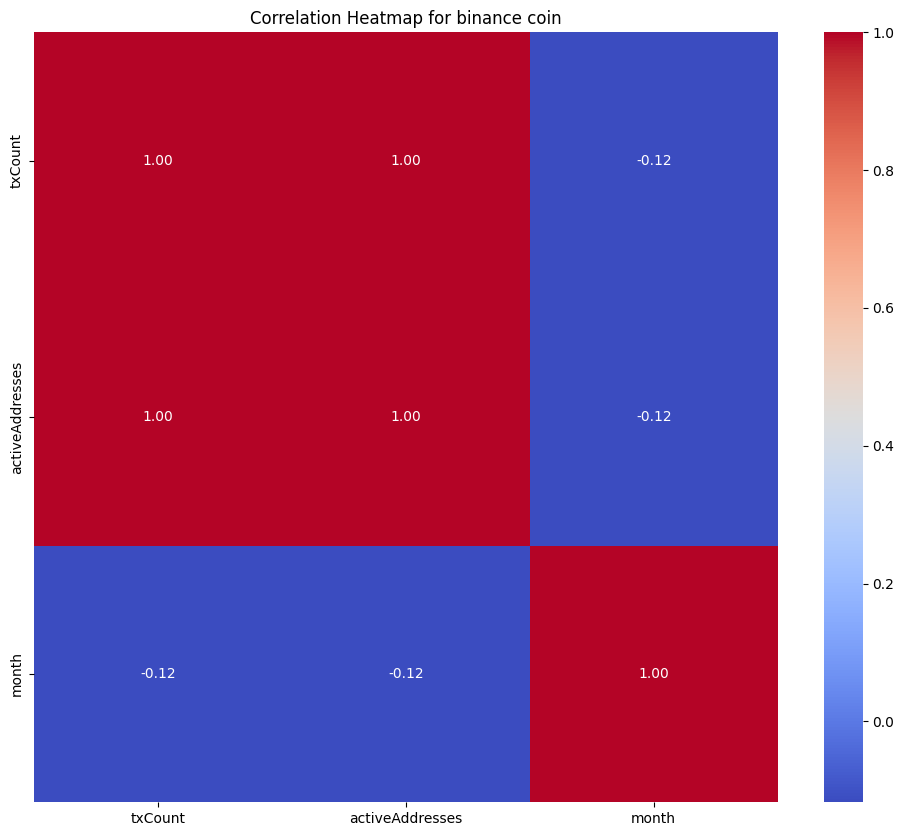

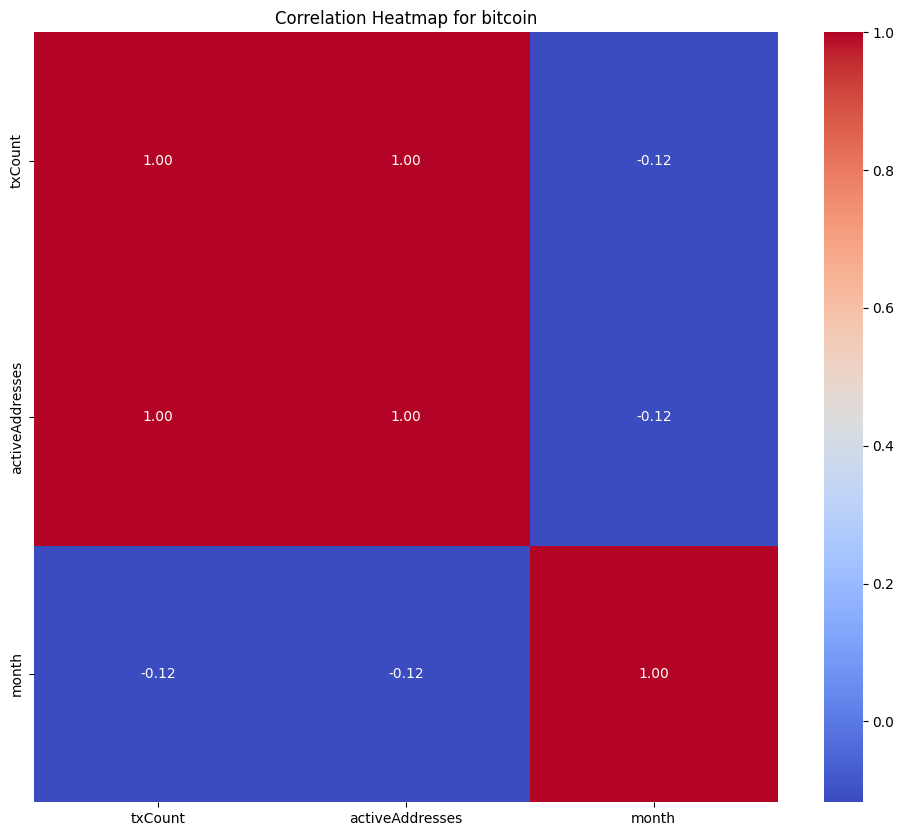

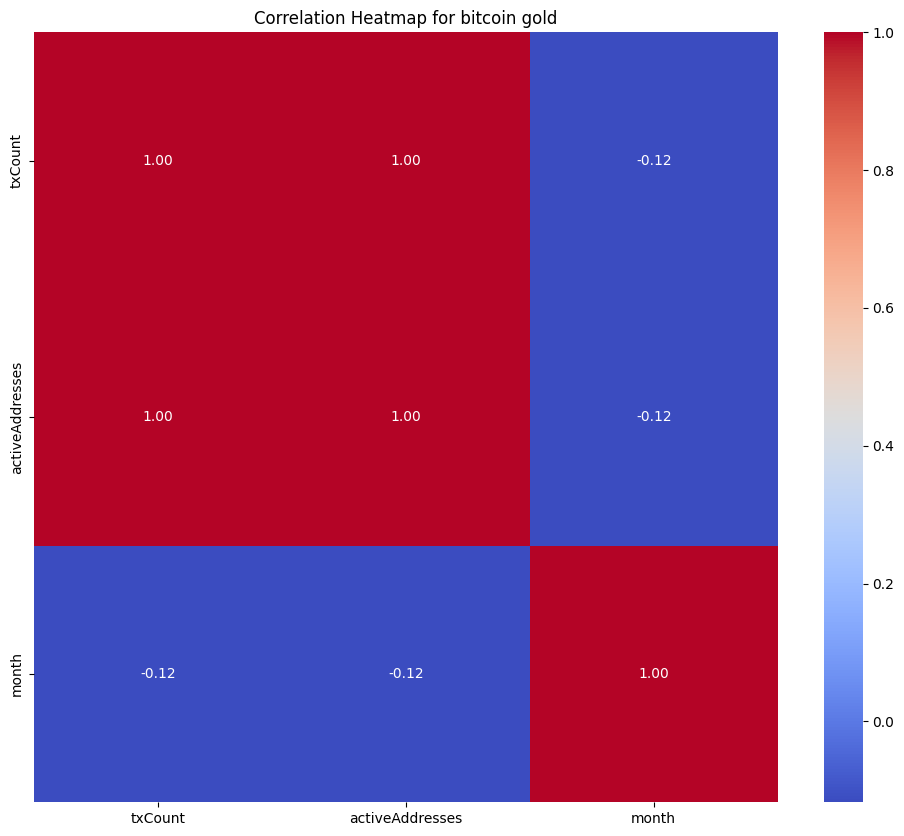

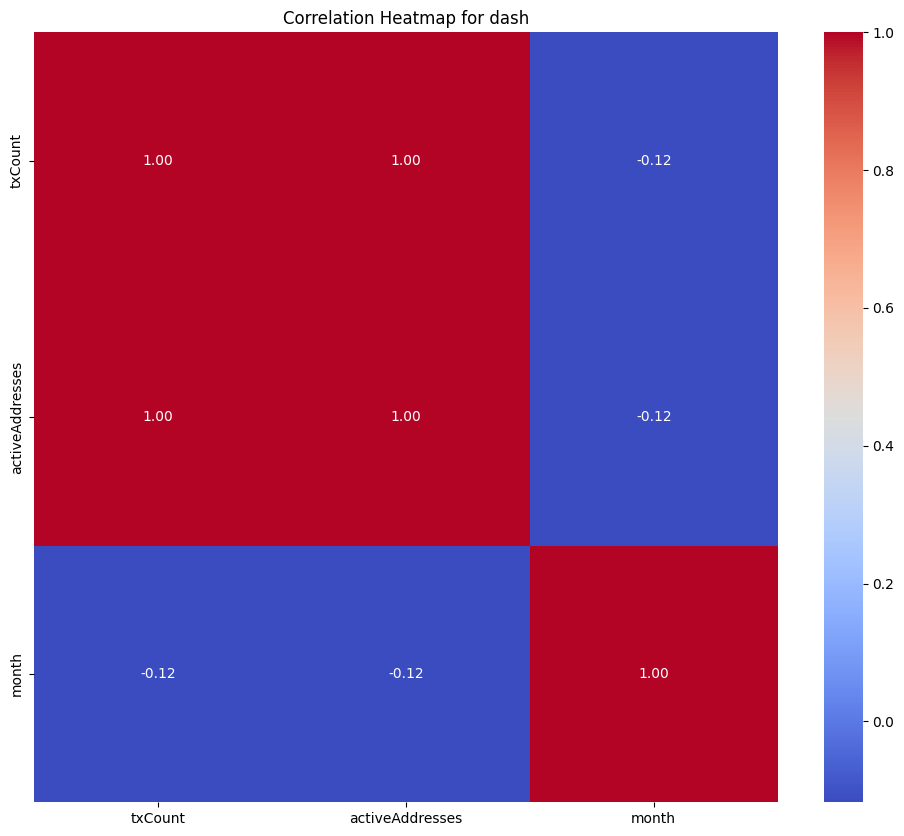

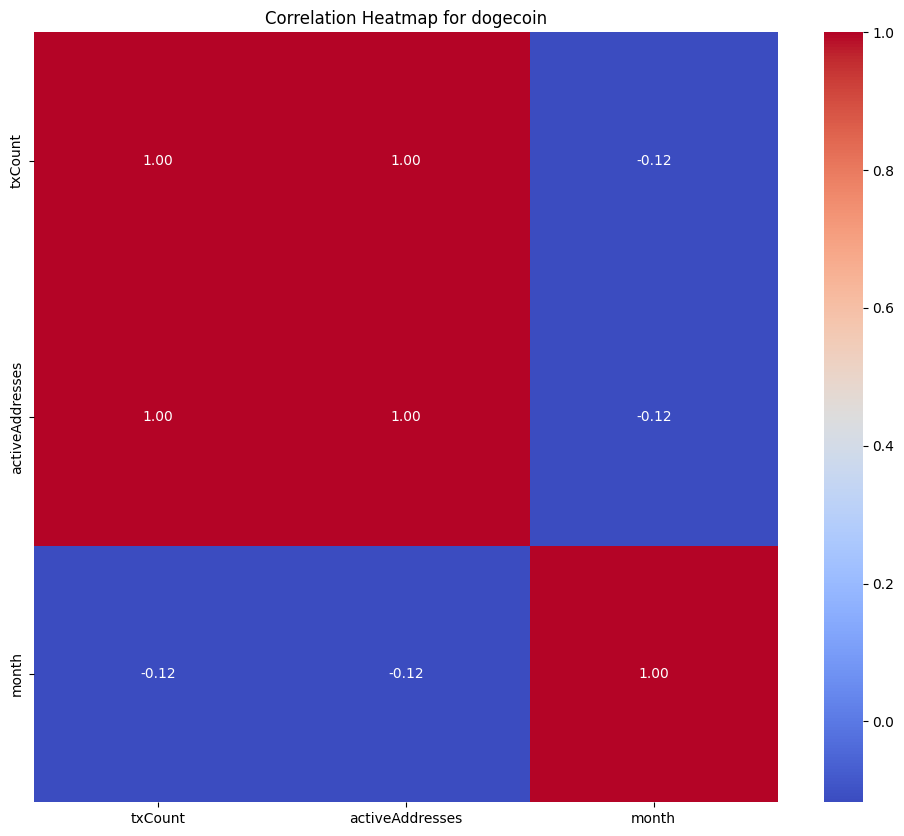

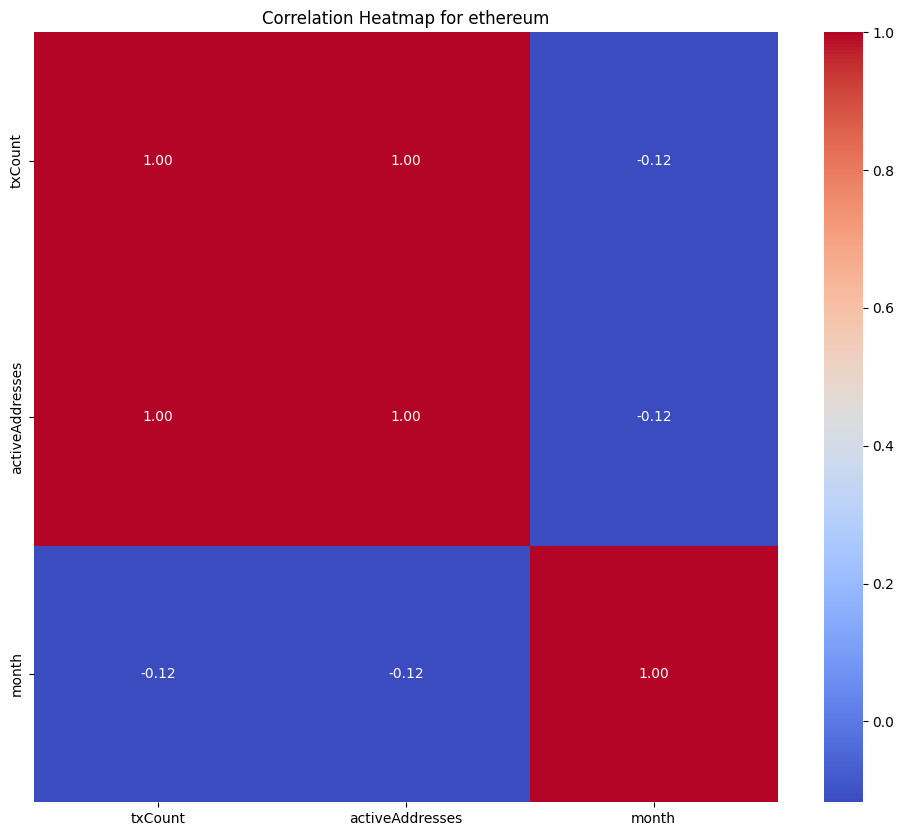

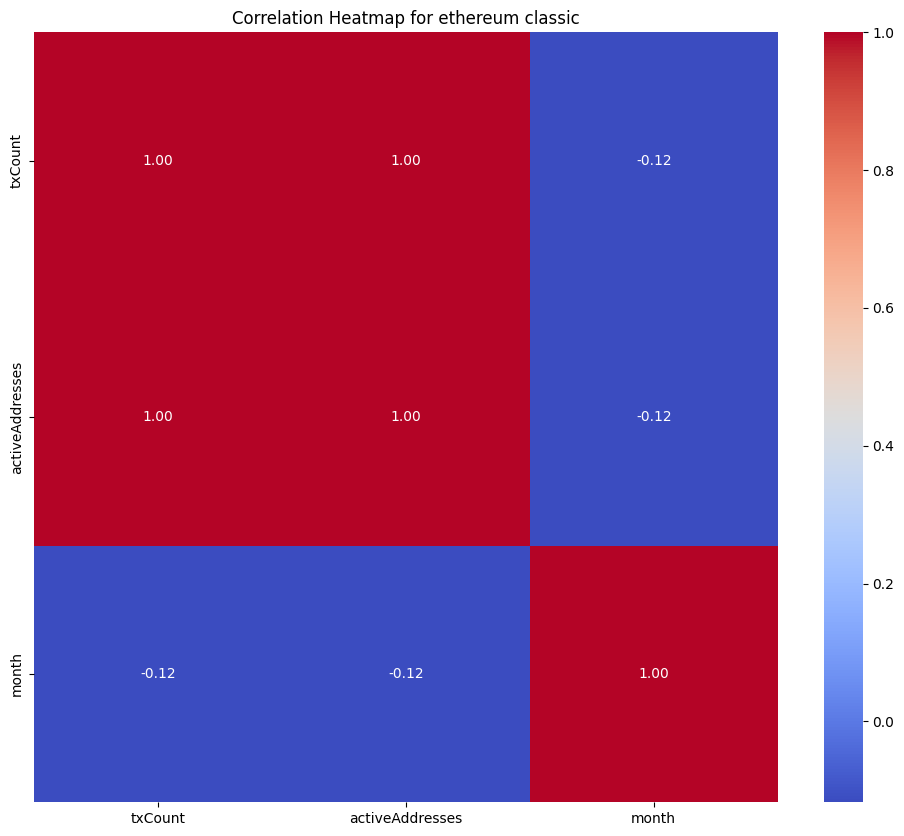

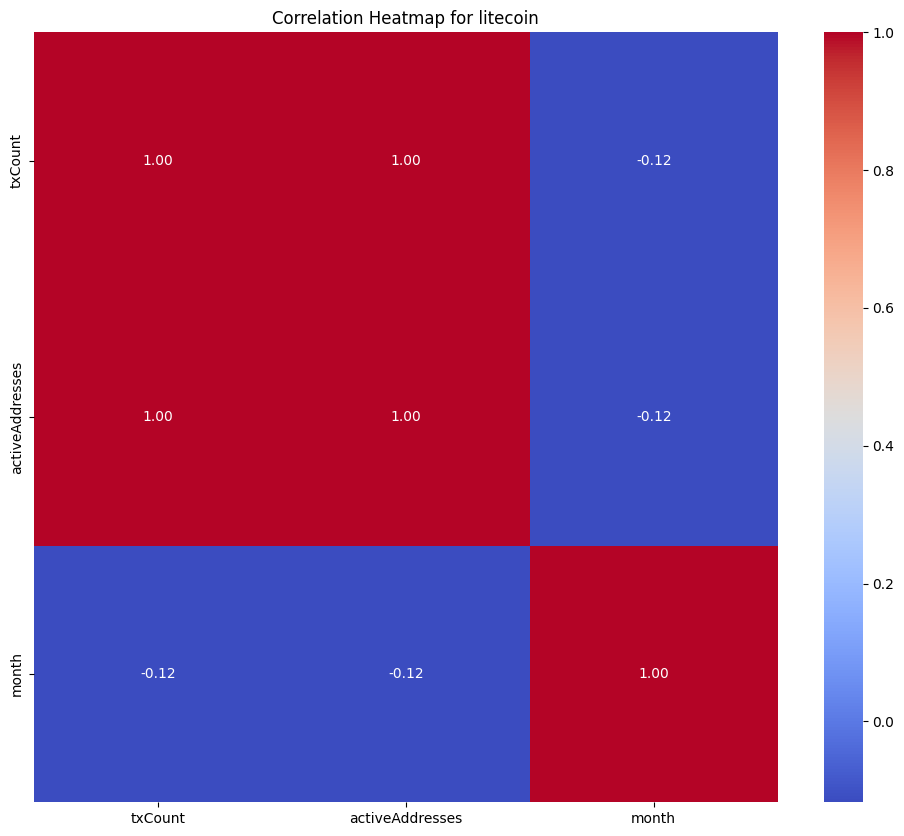

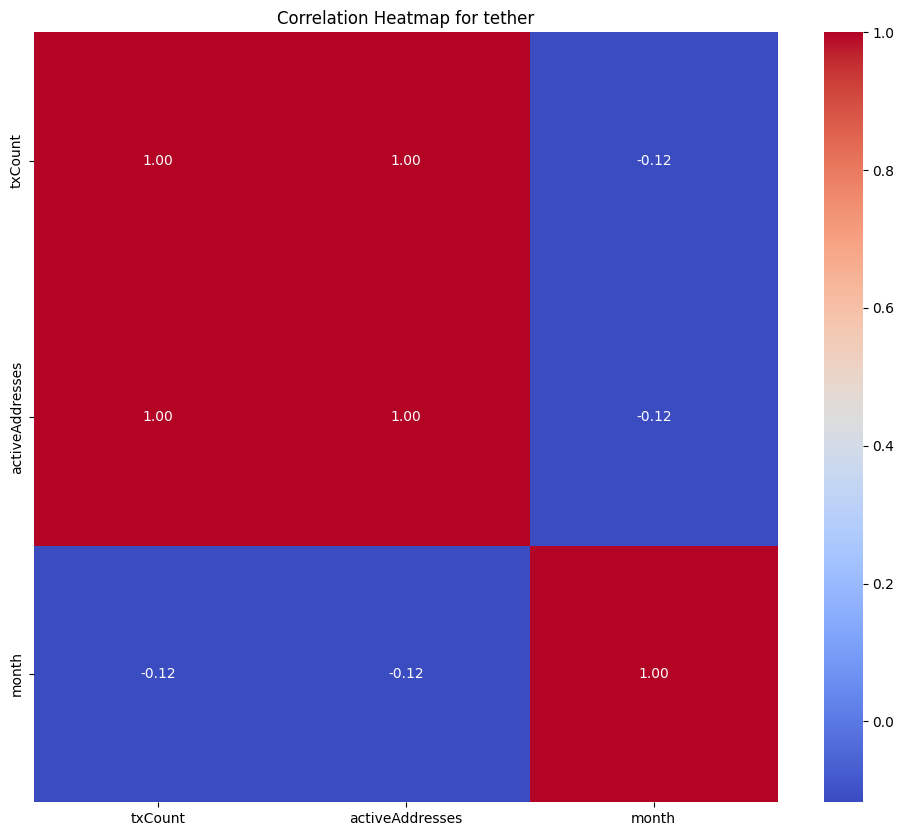

In [53]:
def visualize_boxplot_for_month(BC: pd.DataFrame, currency: str):
    plt.figure(figsize=(10, 6))
    for col in BC.columns:
        if col != 'month':
            sns.boxplot(x='month', y=col, data=BC)
            plt.xlabel("Month")
            plt.ylabel(col)
            plt.title(f"Box Plot of {col} for {currency} per month")
            plt.show()

# Assuming you have your 'data_per_month' DataFrame and 'cryptocurrencies' list
for i in range(len(cryptocurrencies)):
    visualize_boxplot_for_month(data_per_month, cryptocurrencies[i])


def visualize_histogram_for_month(BC: pd.DataFrame, currency: str):
    plt.figure(figsize=(10, 6))
    for col in BC.columns:
        if col != 'month':
            plt.hist(BC[col], bins=20, alpha=0.7, label=col)  # Adjust bins as needed
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.title(f"Histogram of {col} for {currency} per month")
            plt.legend()
            plt.show()

# Assuming you have your 'data_per_month' DataFrame and 'cryptocurrencies' list
for i in range(len(cryptocurrencies)):
    visualize_histogram_for_month(data_per_month, cryptocurrencies[i])


def visualize_heatmap_correlation(BC: pd.DataFrame, currency: str):
    plt.figure(figsize=(12, 10))
    correlation_matrix = BC.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Heatmap for {currency}")
    plt.show()

# Example usage (replace with your actual DataFrame and currency name)
for i in range(len(cryptocurrencies)):
    visualize_heatmap_correlation(data_per_month, cryptocurrencies[i])


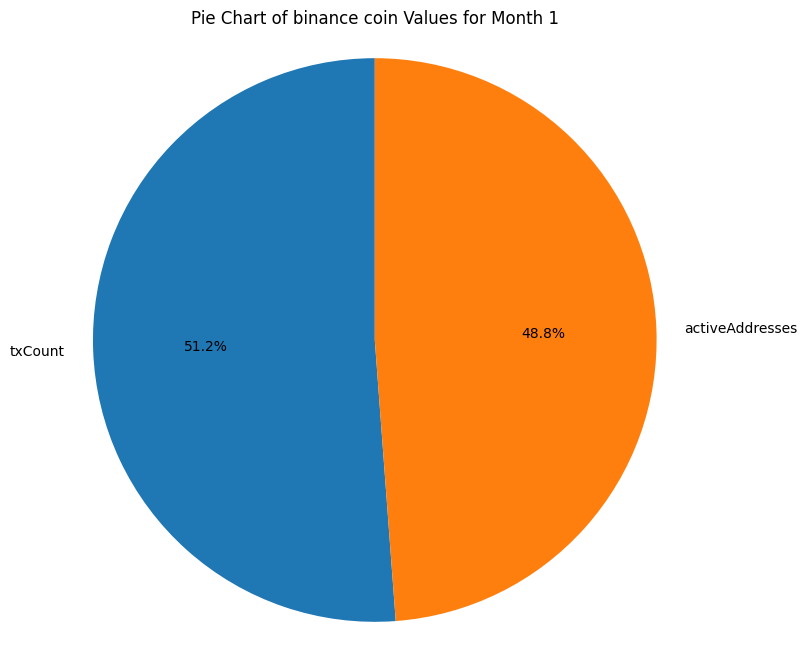

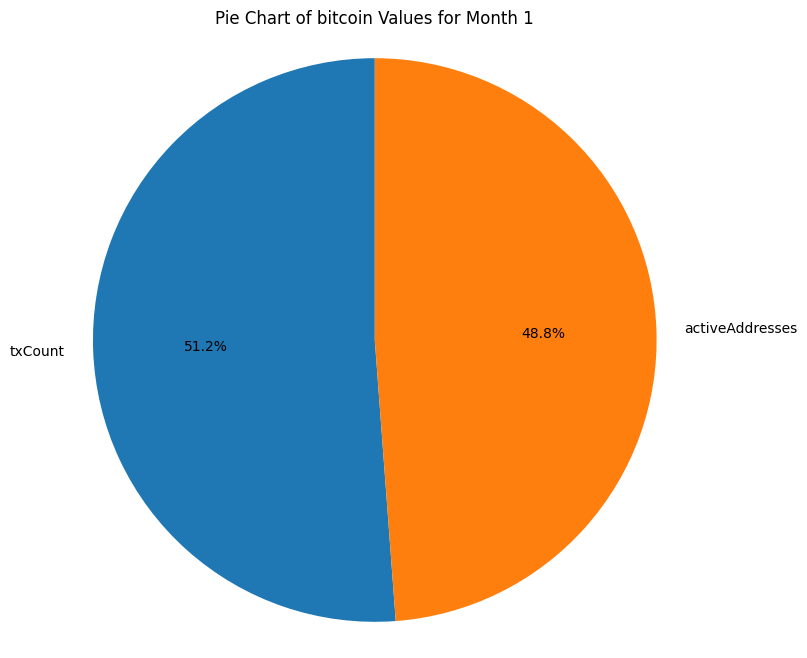

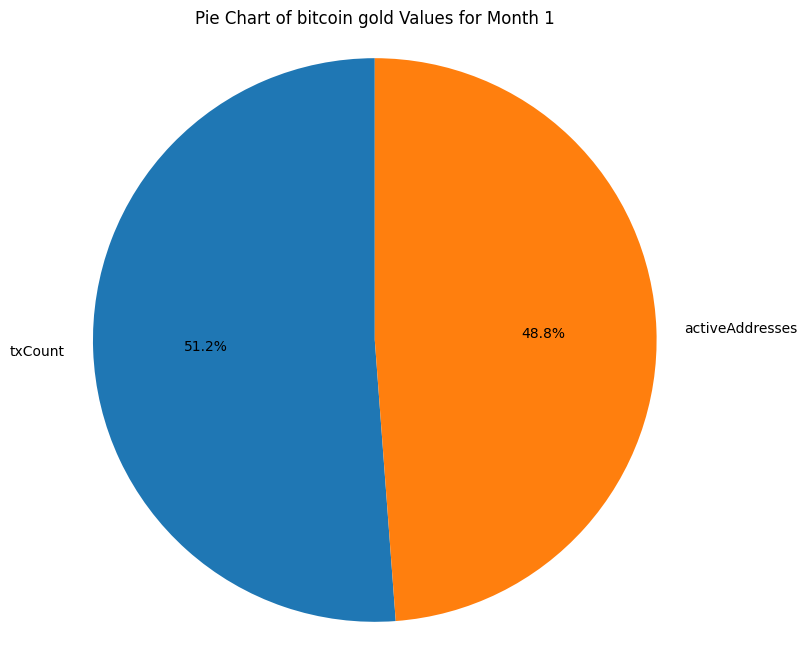

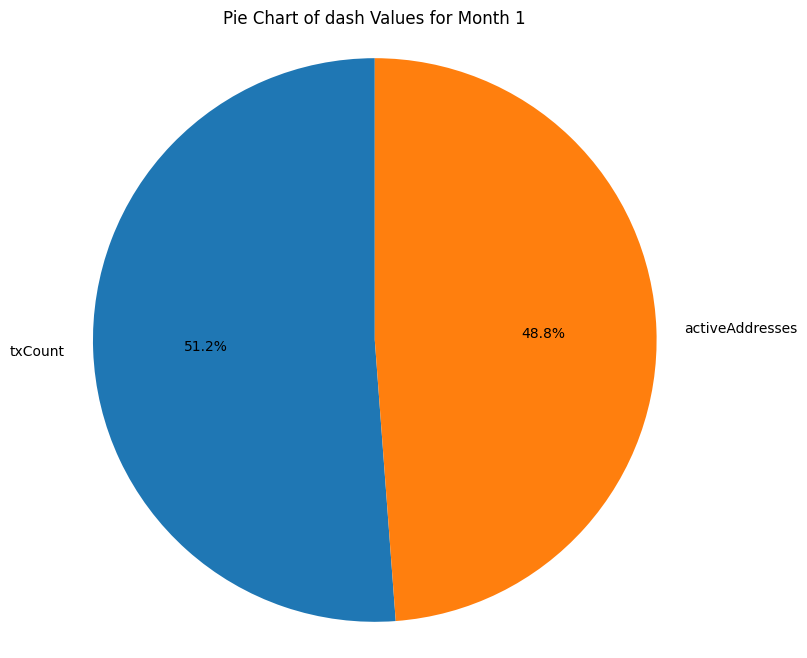

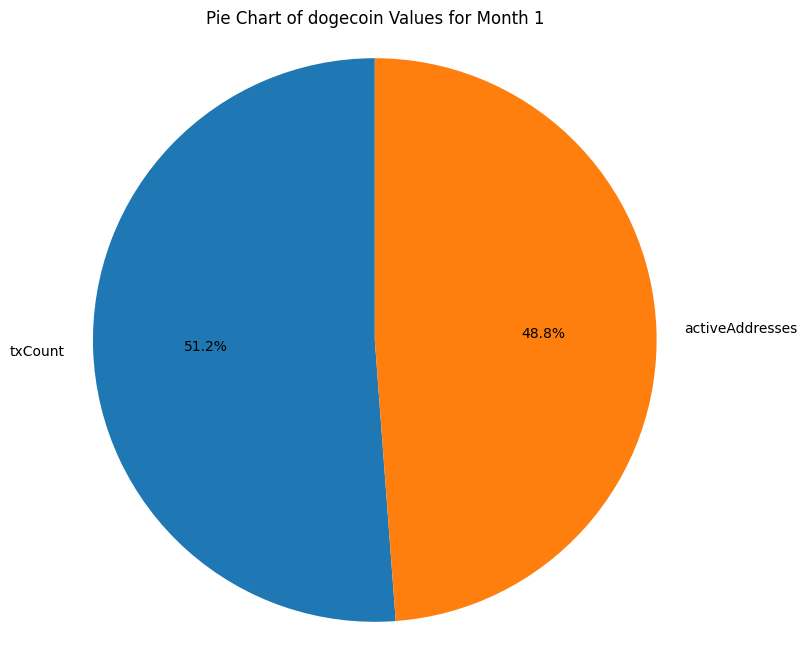

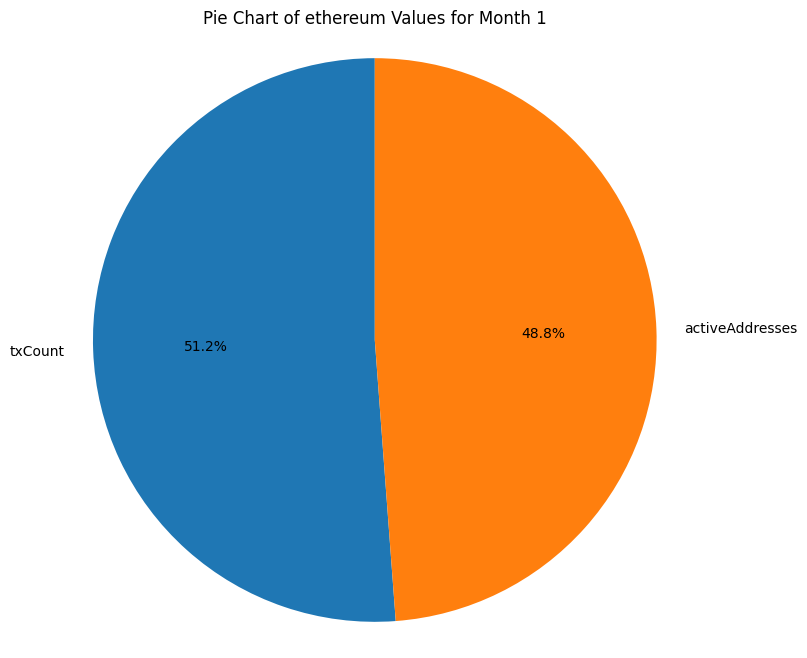

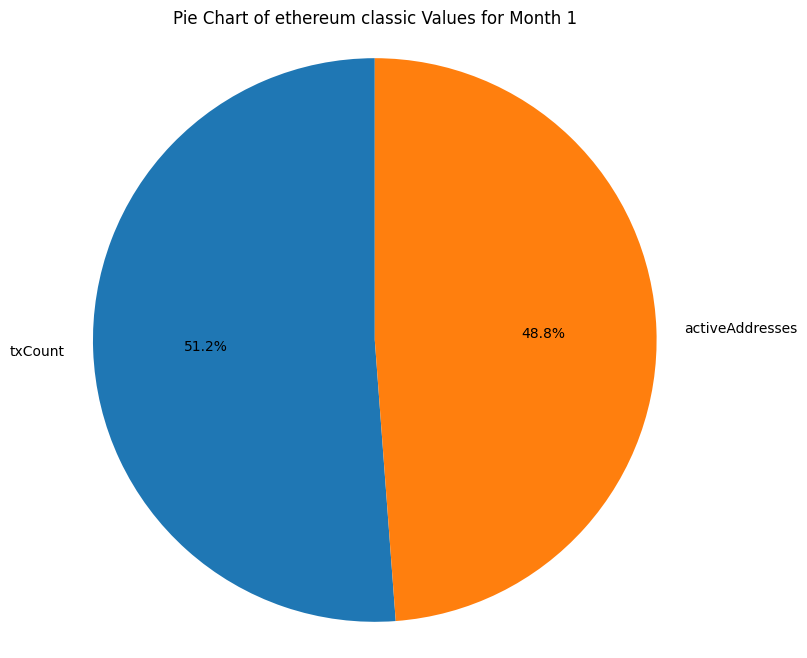

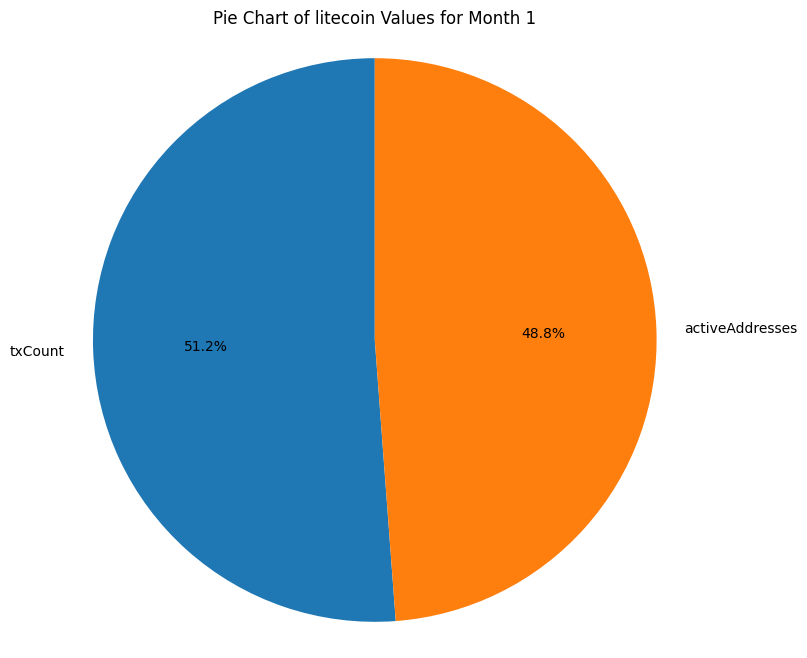

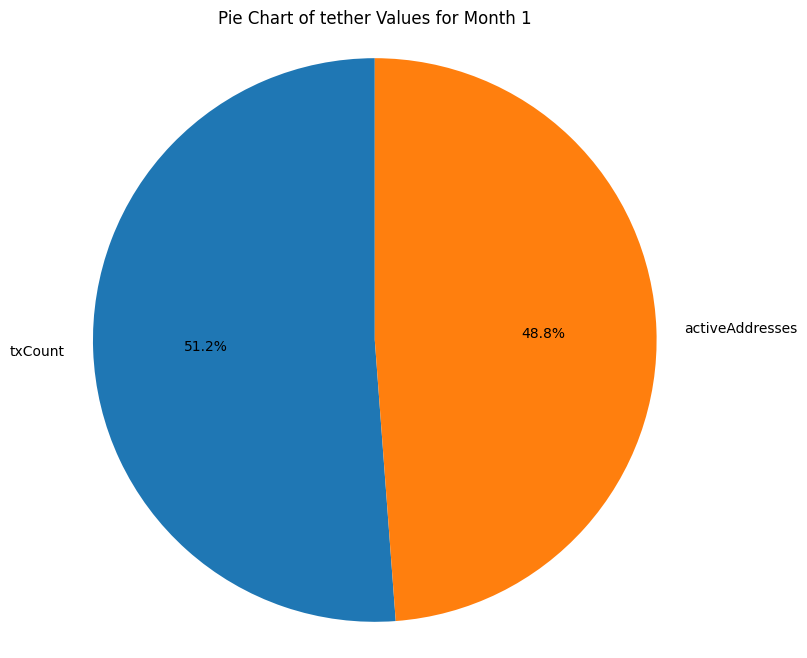

In [57]:
def visualize_pie_chart_for_month(BC: pd.DataFrame, currency: str):
    plt.figure(figsize=(8, 8))

    # Select a specific month's data (e.g., month 1)
    month_data = BC[BC['month'] == 1]

    if not month_data.empty:
        # Calculate the sum of values for each cryptocurrency in the selected month
        value_sums = month_data.sum()

        # Remove the 'month' column from the sums
        value_sums = value_sums.drop('month')

        # Create the pie chart
        plt.pie(value_sums, labels=value_sums.index, autopct='%1.1f%%', startangle=90)
        plt.title(f"Pie Chart of {currency} Values for Month 1")
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()
    else:
        print(f"No data found for month 1 for {currency}")

# Example usage
for i in range(len(cryptocurrencies)):
    visualize_pie_chart_for_month(data_per_month, cryptocurrencies[i])
